In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile as zf
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, Normalizer, MinMaxScaler, StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from ipywidgets import interact, IntSlider, FloatSlider
import pickle
from sklearn.metrics import confusion_matrix 

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
path = r"C:\Users\Administrator\Documents\AIsat\Group_Project\credit_card_churn.csv"

In [5]:
#with zf.ZipFile(path, 'r') as myfile:
    #myfile.extractall()

In [6]:
#filePaths = r"C:\Users\Administrator\Documents\AIsat\Group_Project\datasets"

In [7]:
"""files = []
for file in os.listdir(filePaths):
    filePath = os.path.join(filePaths, file)
    for file in glob.glob(os.path.join(filePath, '*csv')):
        files.append(file)
    for xlsFile in glob.glob(os.path.join(filePath, '*xlsx')):
        files.append(xlsFile)
    
    """

"files = []\nfor file in os.listdir(filePaths):\n    filePath = os.path.join(filePaths, file)\n    for file in glob.glob(os.path.join(filePath, '*csv')):\n        files.append(file)\n    for xlsFile in glob.glob(os.path.join(filePath, '*xlsx')):\n        files.append(xlsFile)\n    \n    "

In [8]:
#files

In [9]:
df1 = pd.read_csv(path)
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [10]:
df1.info(verbose= 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
df1.shape

(10127, 23)

In [12]:
# renaming the long columns
df1.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_Classifier_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Classifier_2'}, 
          inplace=True)

In [13]:
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Classifier_1  \
0                    1.625                  0.061         0.000093   
1                    3.714                  0.105         0.000057   
2                    2.333                  0.000         0.000021   
3                    2.333                  0.760         0.000134   
4                    2.500                  0.000         0.000022   
...                    ...                    ...              ... 

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
#checking for missing values
df1.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Classifier_1             0
NB_Classifier_2             0
dtype: int64

In [16]:
df1['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [17]:
#checking for duplicate
df1.duplicated().sum()


0

In [18]:
print('Maximum Age', df1.Customer_Age.max())
print('Minimum Age', df1.Customer_Age.min())

Maximum Age 73
Minimum Age 26


In [19]:
bins = [20, 35, 50, 100]
labels = ['Young Adult', 'Adult', 'Senior']
df1['Age_Group'] = pd.cut(df1['Customer_Age'], bins= bins, labels= labels)


In [20]:
#mapping the categorical data
catgorical = df1.select_dtypes('object')
catgorical

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

In [21]:
def bar(df, column, figsize=[8,6]):
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=figsize)
    color = sb.color_palette()[0]
    base_order = df[column].value_counts().index
    bar = sb.countplot(data=df, x=column, color=color, order=base_order)
    plt.title(column + ' '+ 'Distribution')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=20)

In [22]:
#checking for categorical columns
catgorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

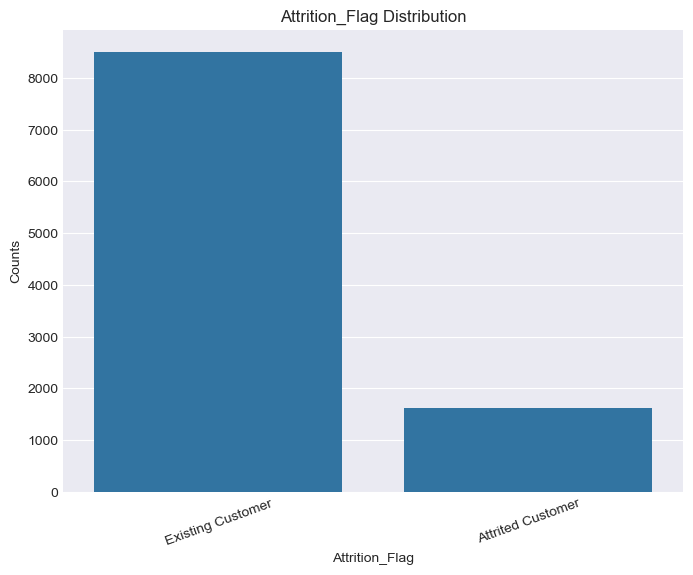

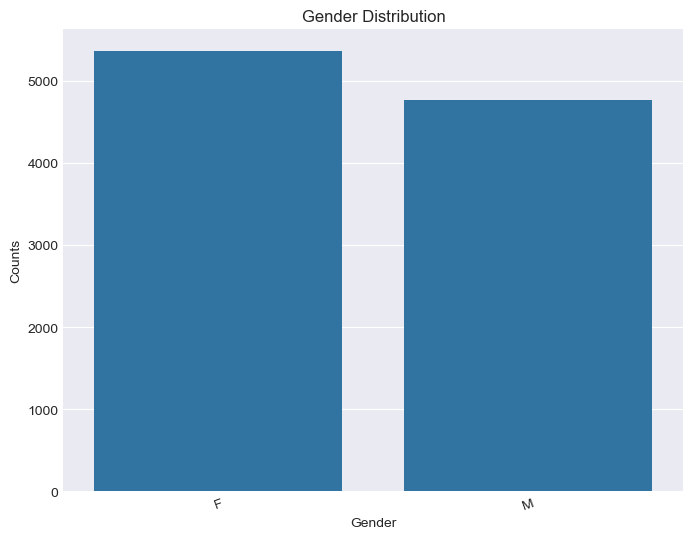

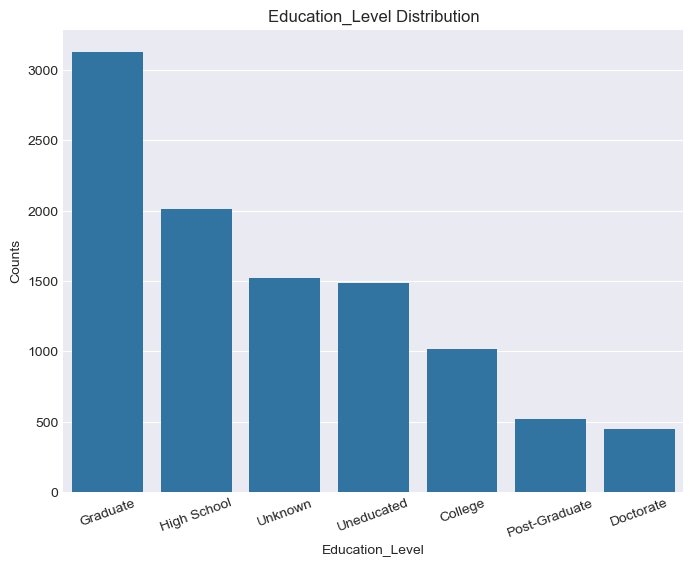

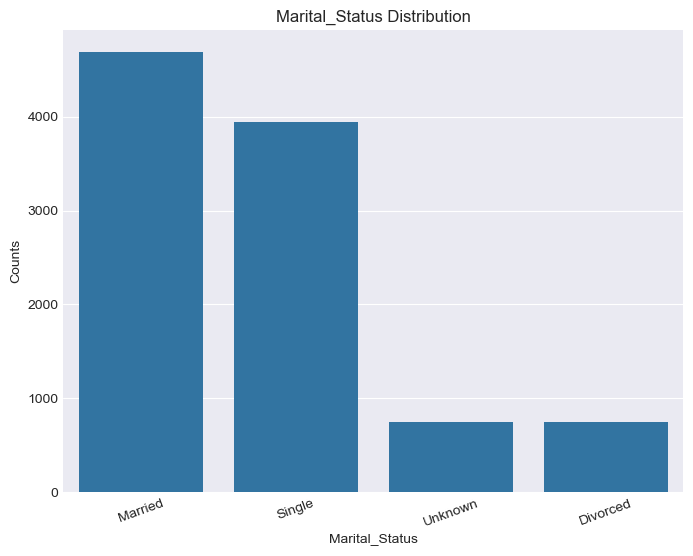

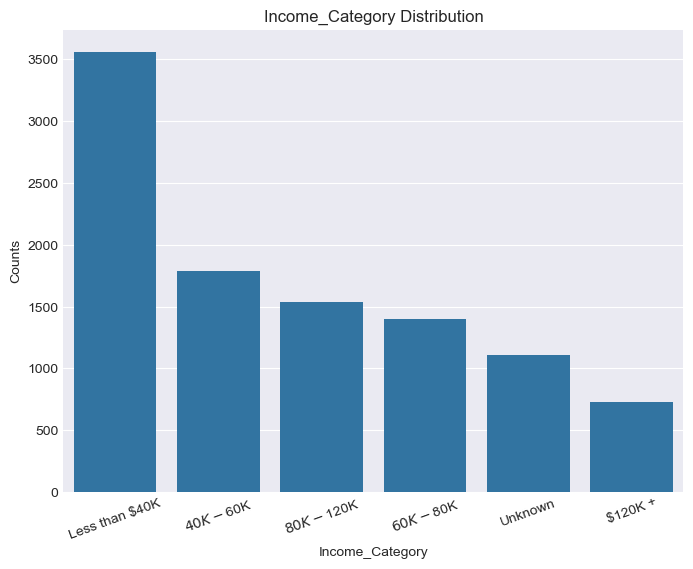

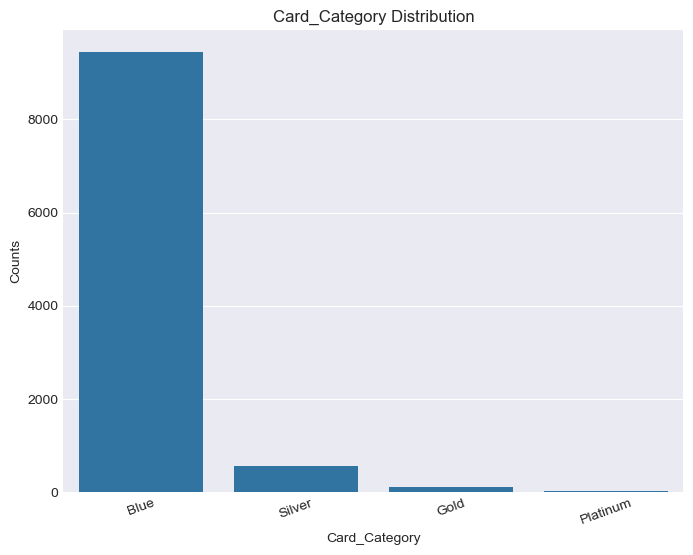

In [23]:
for cate in catgorical.columns:
    bar(df1, cate)

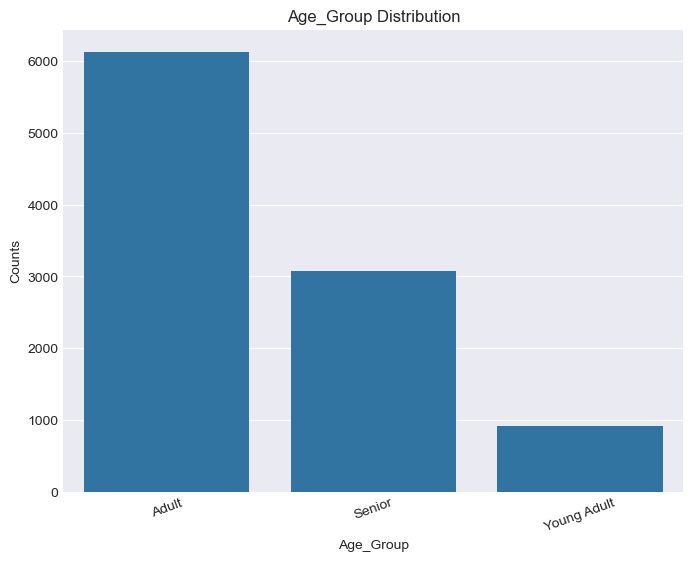

In [24]:
bar(df1, 'Age_Group')

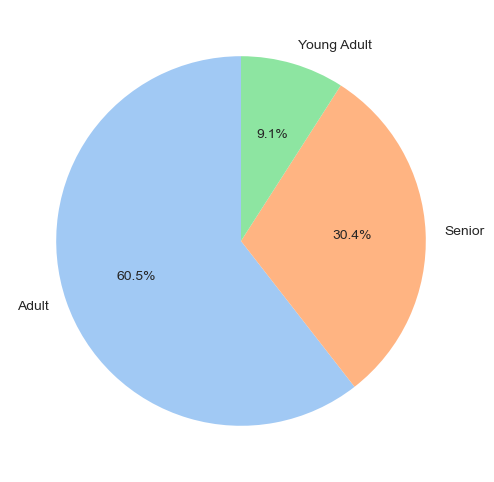

In [25]:
age_group_counts = df1['Age_Group'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'));

In [26]:
number = df1.select_dtypes('number')
number

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Classifier_1  \
0                    1.625                  0.061         0.000093   
1                    3.714                  0.105         0.000057   
2                    2.333                  0.000         0.000021   
3                    2.333                  0.760         0.000134   
4                    2.500                  0.000         0.000022   
...                    ...                    ...              ...   
10122                0.857                  0.462         0.000191   
10123                0.683                  0.511         0.995270   
10124                0.818                  0.000         0.997880   
10125          

In [27]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

In [28]:
df1.describe().T

count          mean           std           min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  7.080821e+08   
Customer_Age              10127.0  4.632596e+01  8.016814e+00  2.600000e+01   
Dependent_count           10127.0  2.346203e+00  1.298908e+00  0.000000e+00   
Months_on_book            10127.0  3.592841e+01  7.986416e+00  1.300000e+01   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00  1.000000e+00   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00  0.000000e+00   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00  0.000000e+00   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03  1.438300e+03   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02  0.000000e+00   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03  3.000000e+00   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01  0.000000e+00   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03  5.100000e+02   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01  1.000000e+01   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01  0.000000e+00   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01  0.000000e+00   
NB_Classifier_1           10127.0  1.599975e-01  3.653010e-01  7.664200e-06   
NB_Classifier_2           10127.0  8.400026e-01  3.653010e-01  4.199800e-04   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
NB_Classifier_1           9.898300e-05  1.814600e-04  3.373000e-04   
NB_Classifier_2           9.996600e-01  9.998200e-01  9.999000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
NB_Classifier_1           9.995800e-01  
NB_Classifier_2           9.999900e-01

<Figure size 2500x2000 with 0 Axes>

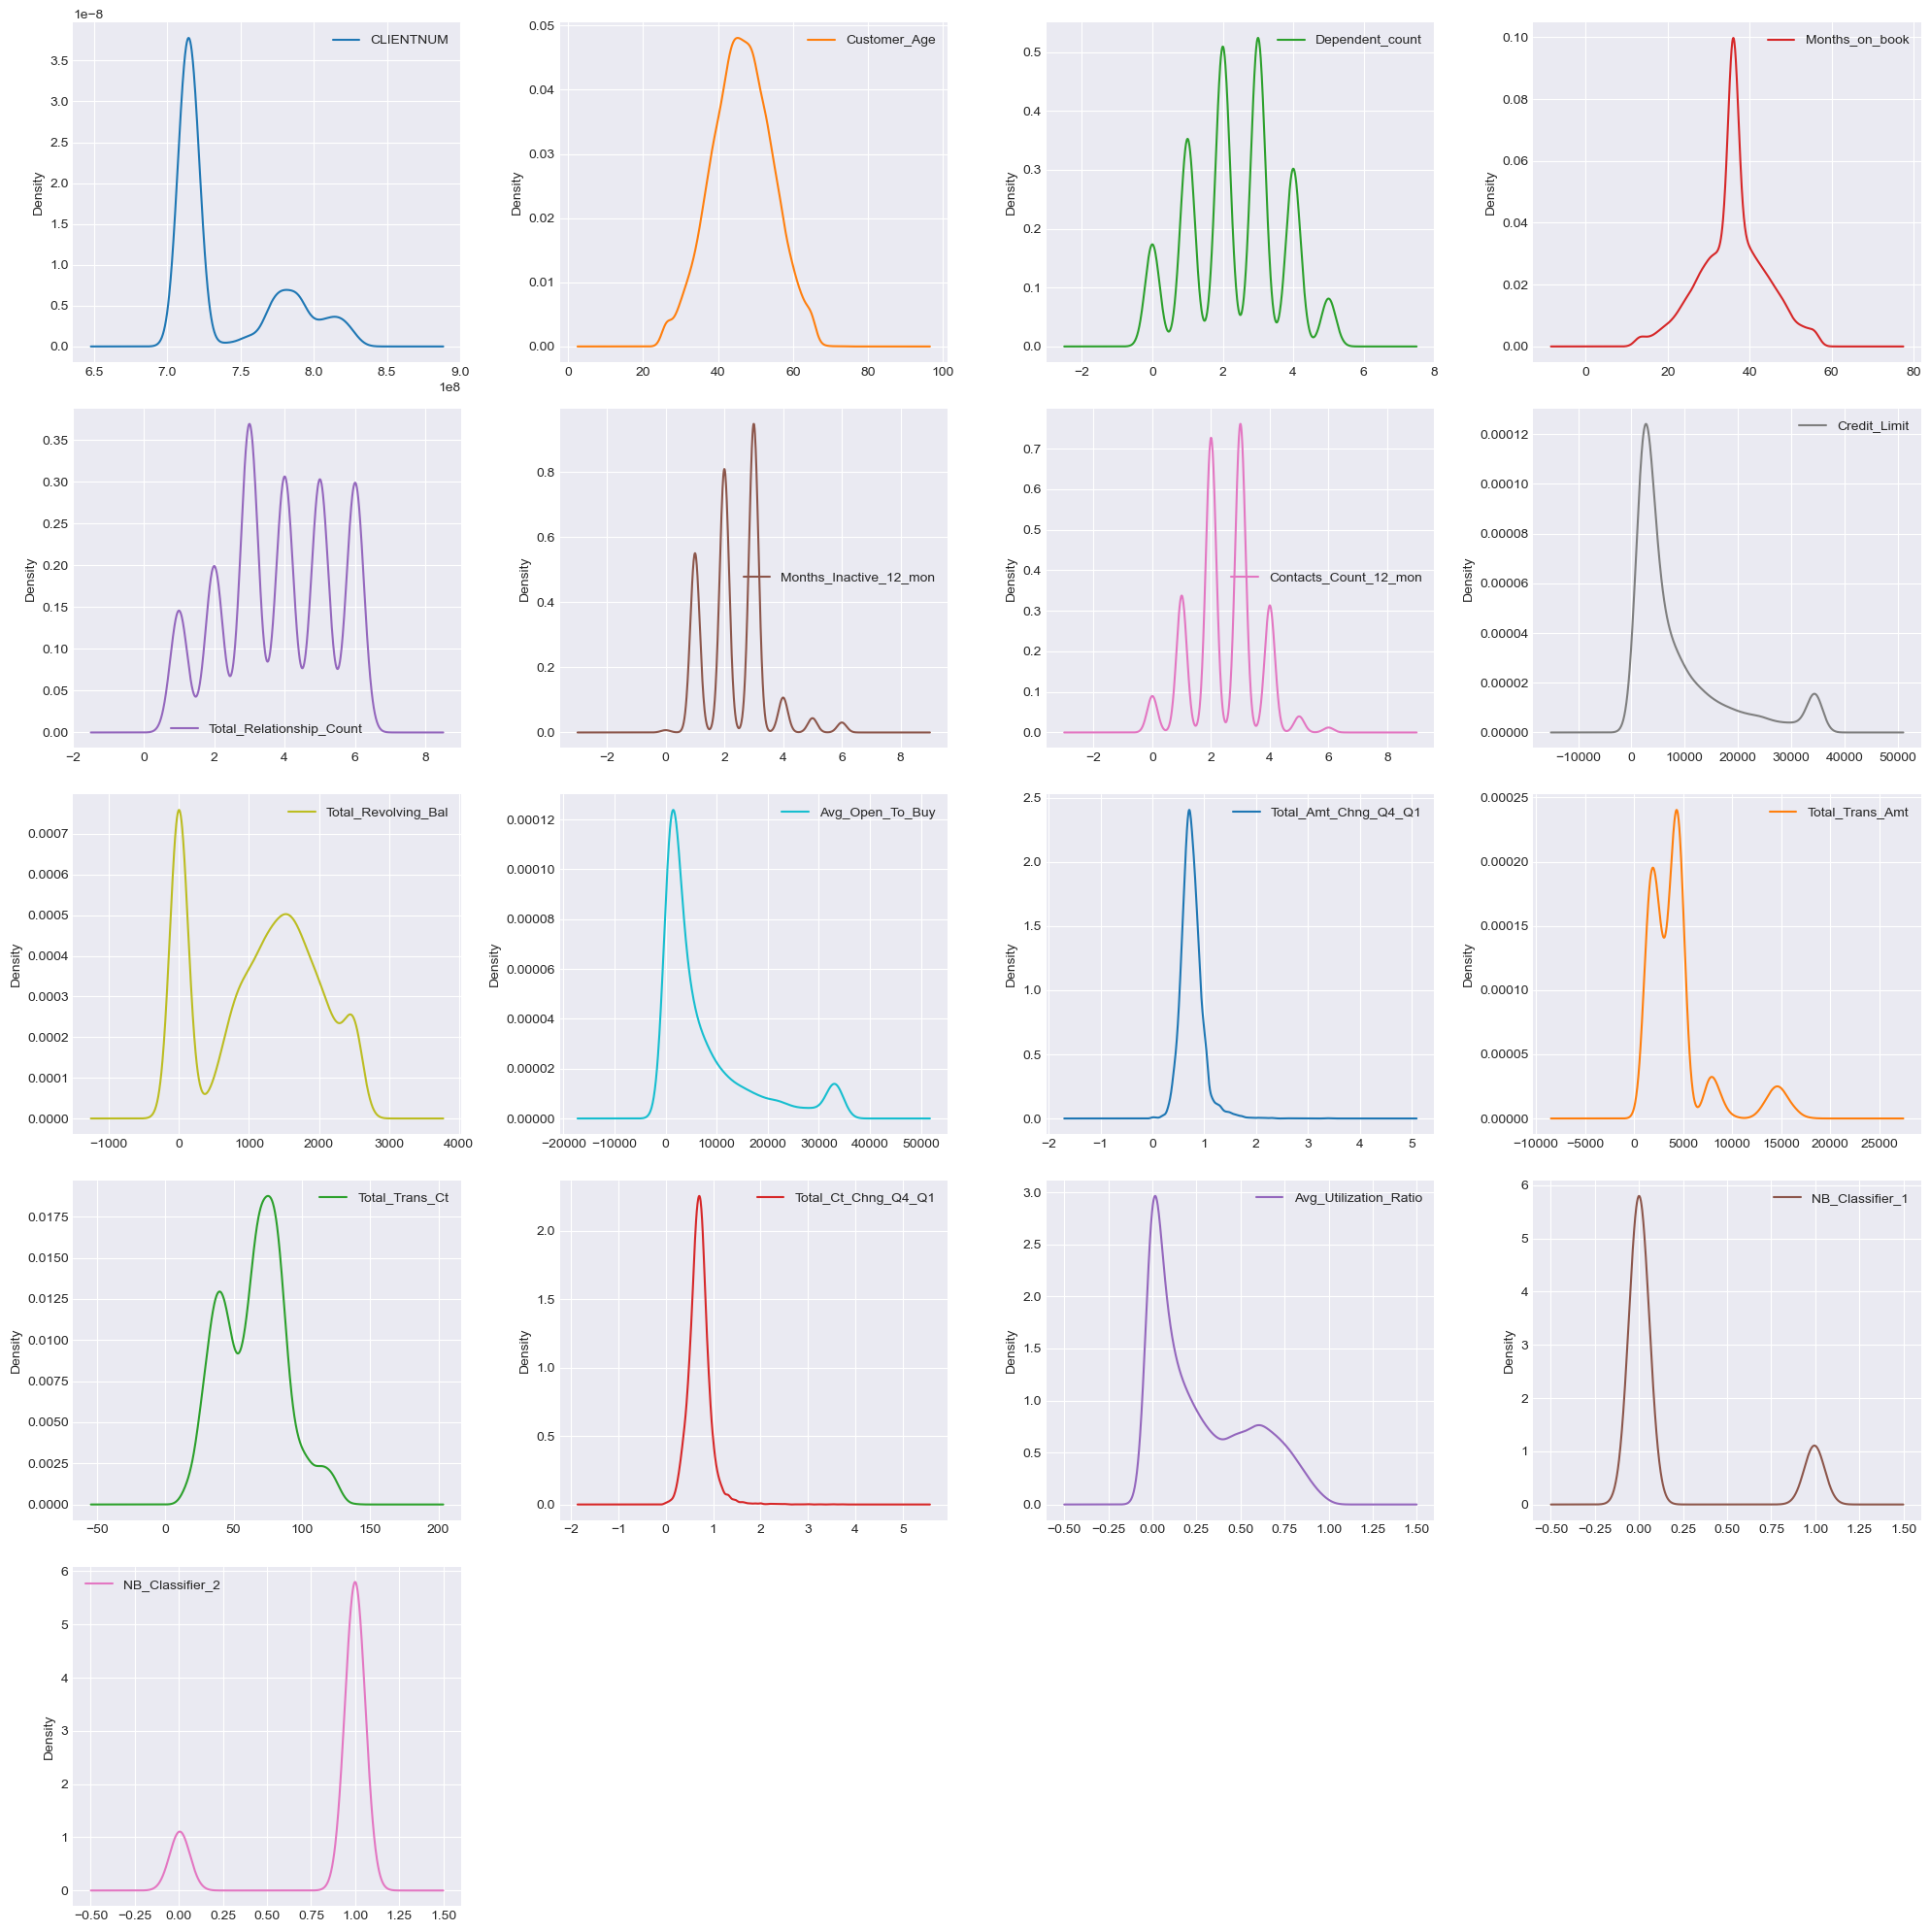

In [29]:
plt.figure(figsize=(25, 20), dpi= 100)
df1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

<Figure size 1500x1200 with 0 Axes>

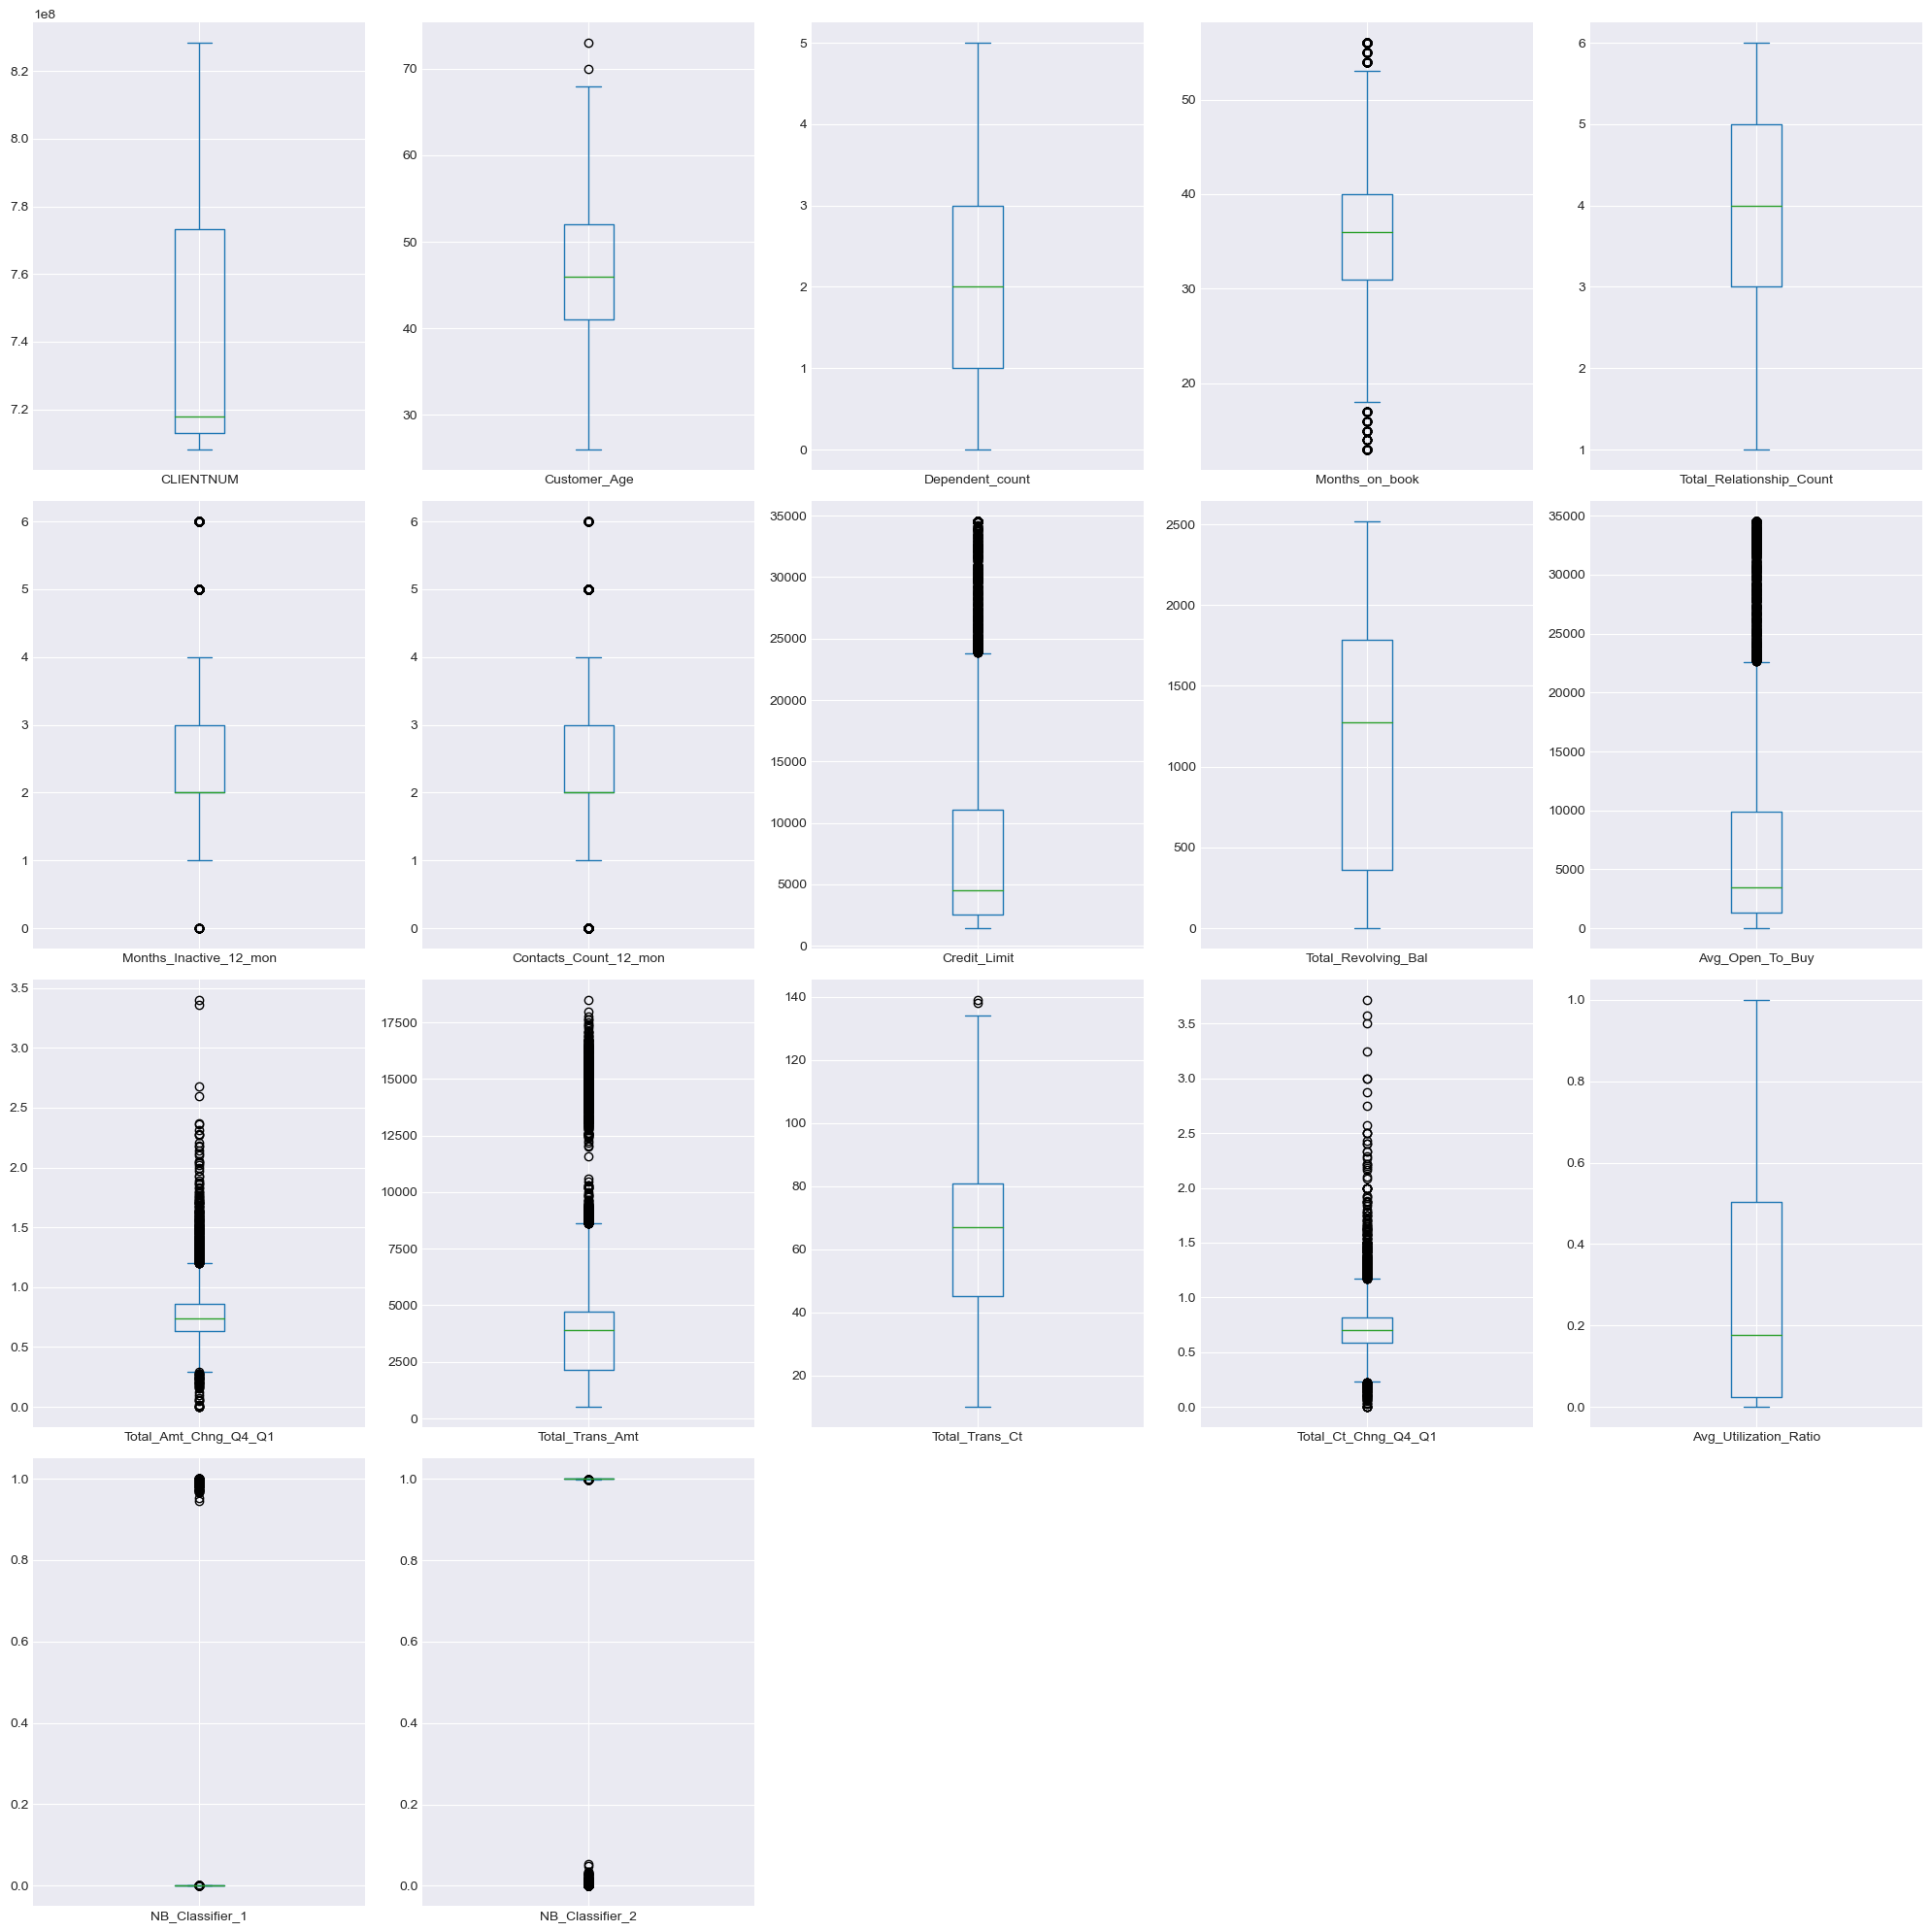

In [30]:
plt.figure(figsize=(25, 20), dpi=60)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Customer Age')

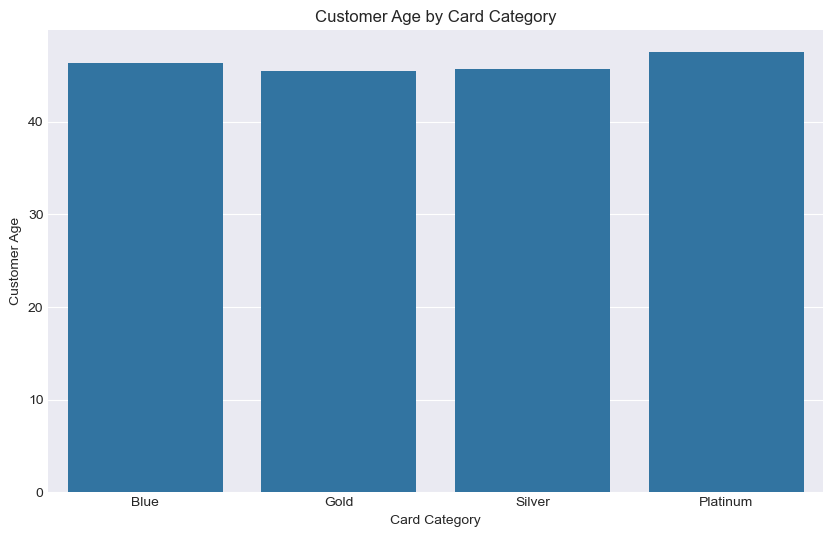

In [31]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.barplot(data= df1, x = 'Card_Category', y= 'Customer_Age', errorbar= None, color= color);
plt.title('Customer Age by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Customer Age')

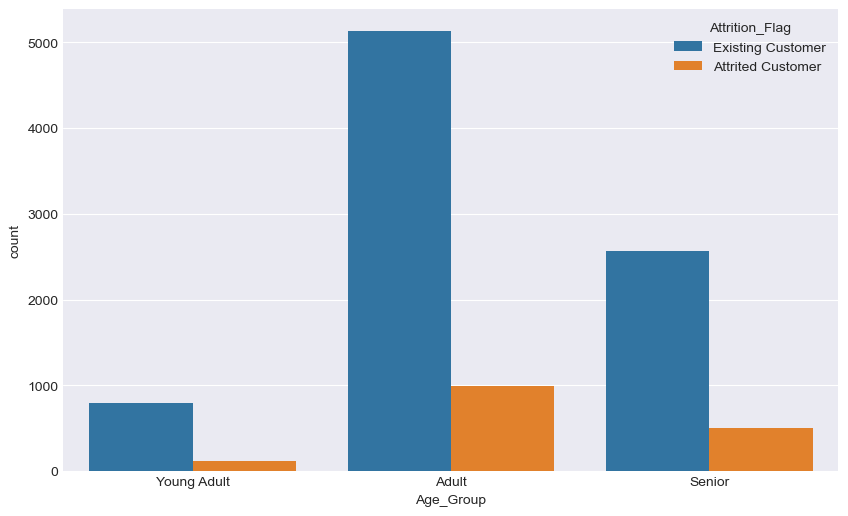

In [32]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.countplot(data= df1, x= 'Age_Group', hue= 'Attrition_Flag');

<Axes: xlabel='Education_Level', ylabel='count'>

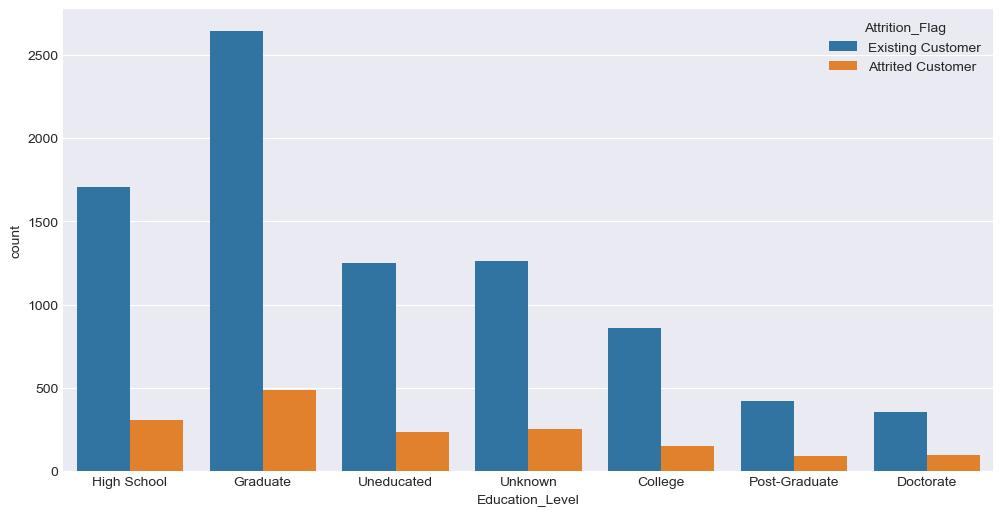

In [33]:

plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Education_Level', hue= 'Attrition_Flag')

<Axes: xlabel='Gender', ylabel='count'>

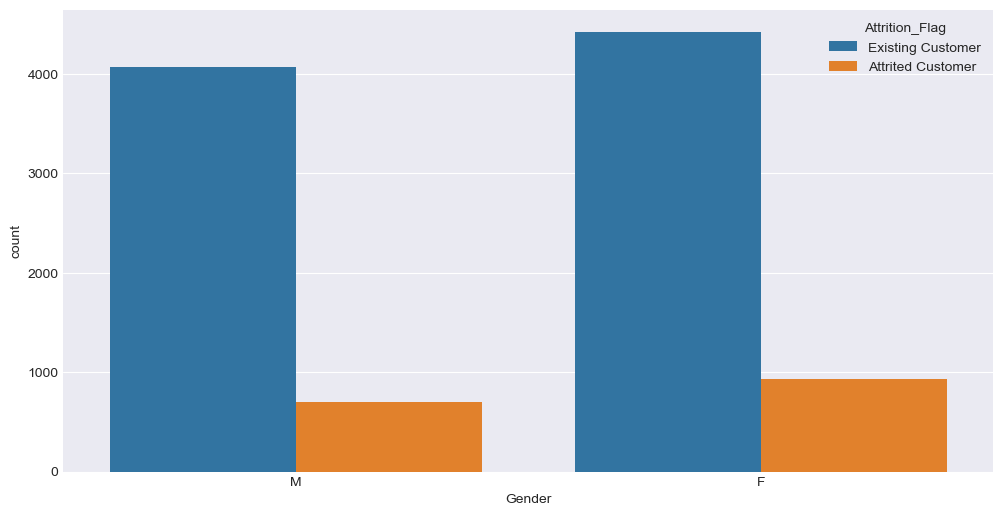

In [34]:
plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Gender', hue= 'Attrition_Flag')

In [35]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

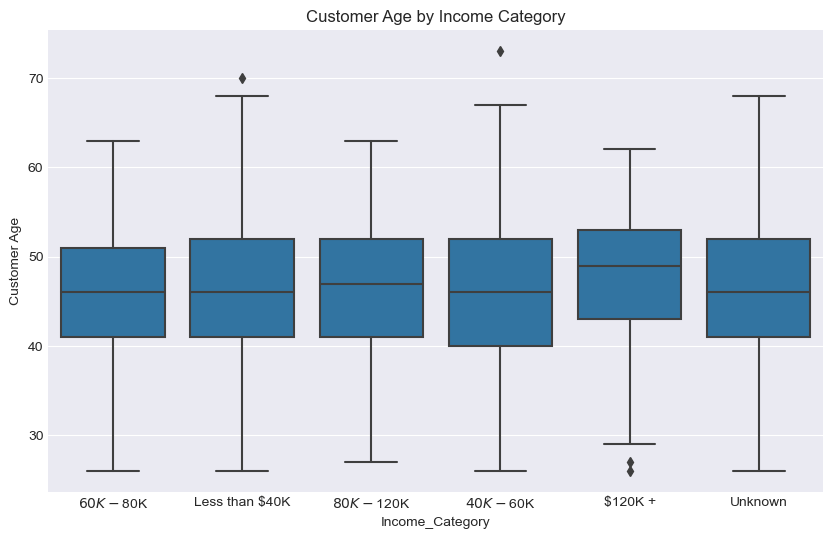

In [36]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.boxplot(data= df1, x = 'Income_Category', y= 'Customer_Age', color= color);
plt.title('Customer Age by Income Category')
plt.xlabel('Income_Category')
plt.ylabel('Customer Age');

## Financial Information

<Axes: >

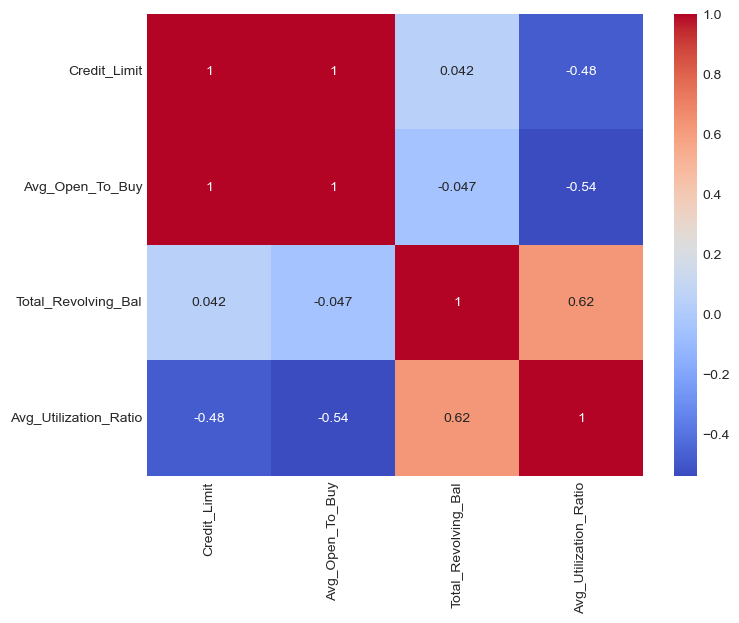

In [37]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']].corr(),
           annot= True, cmap= 'coolwarm')

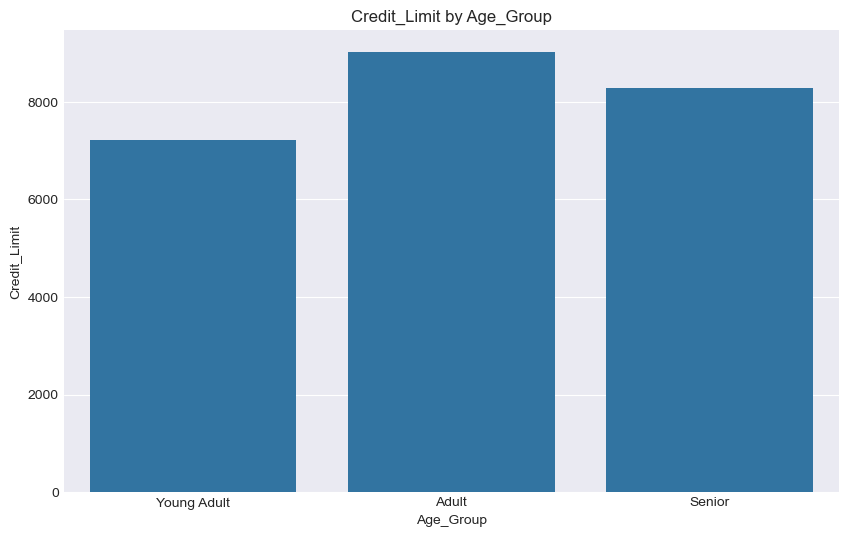

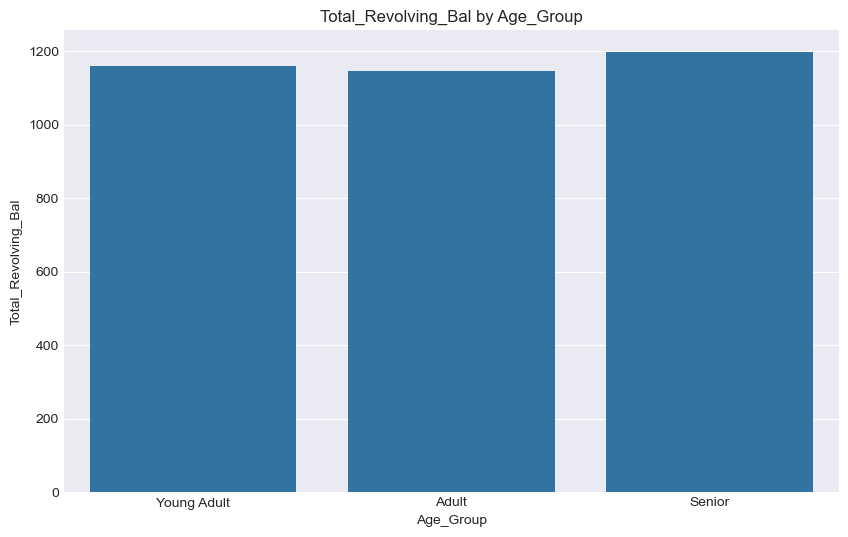

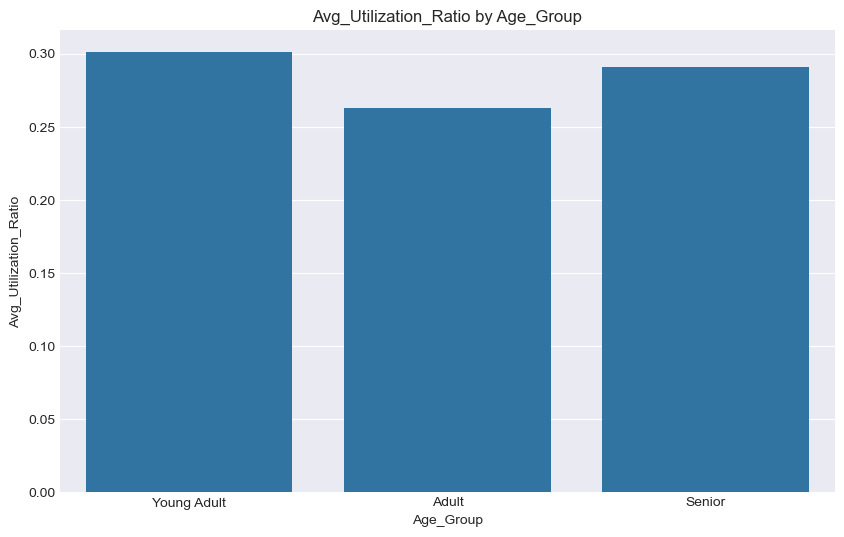

In [38]:
financialColumns = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in financialColumns:
    finbar(df1, 'Age_Group', i)

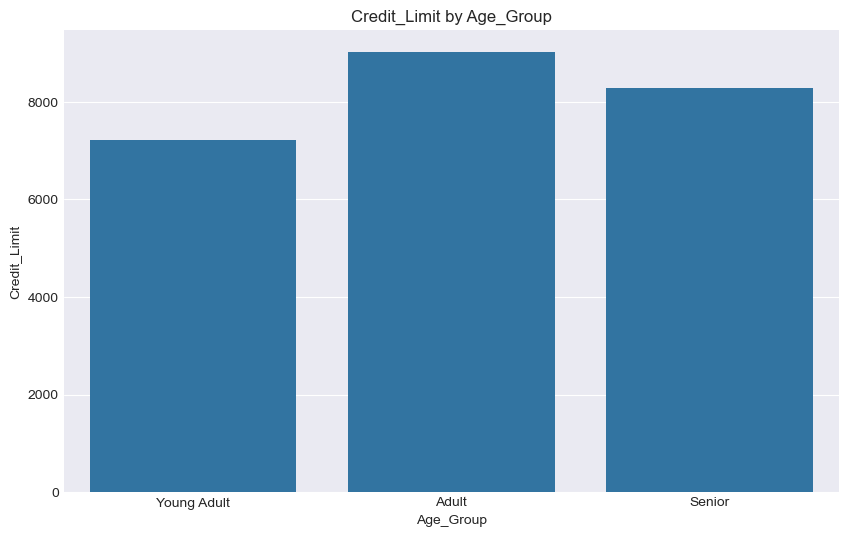

In [39]:
finbar(df1, 'Age_Group', 'Credit_Limit')

## Transaction and Engagement

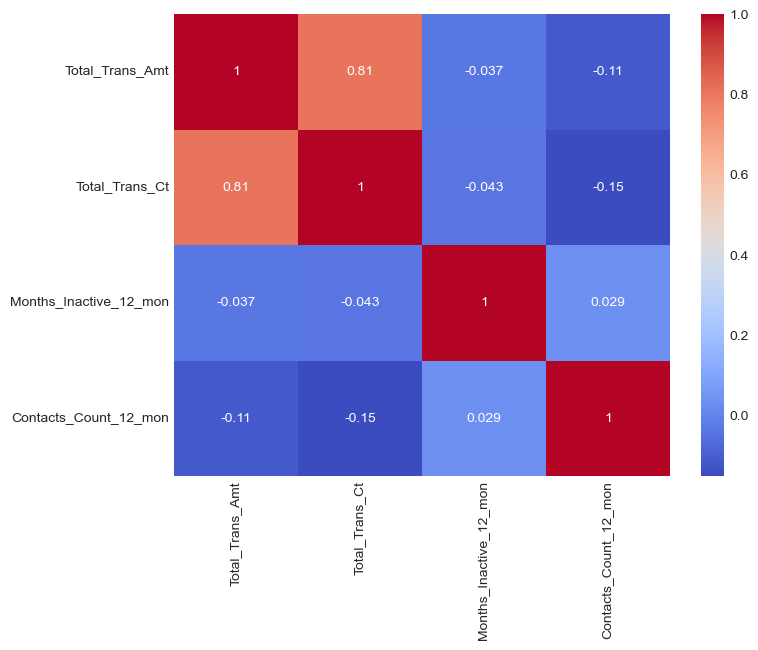

In [40]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].corr(),
           annot= True, cmap= 'coolwarm');

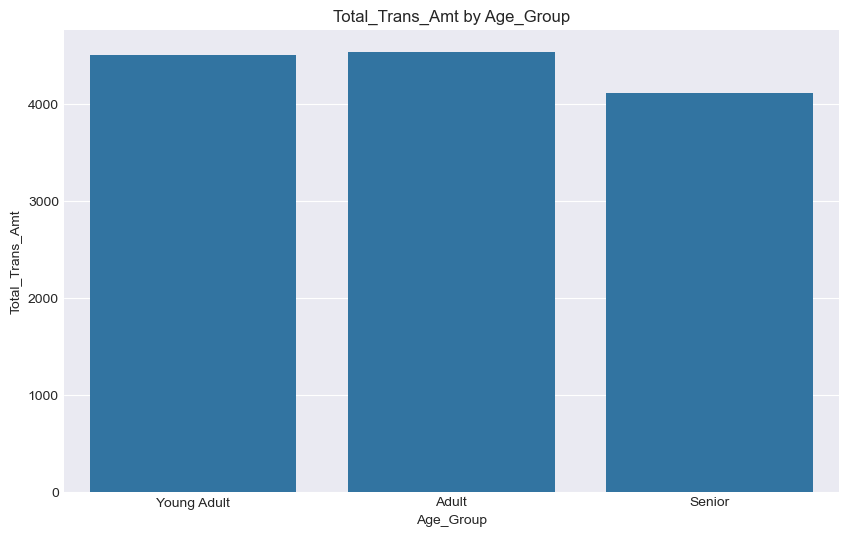

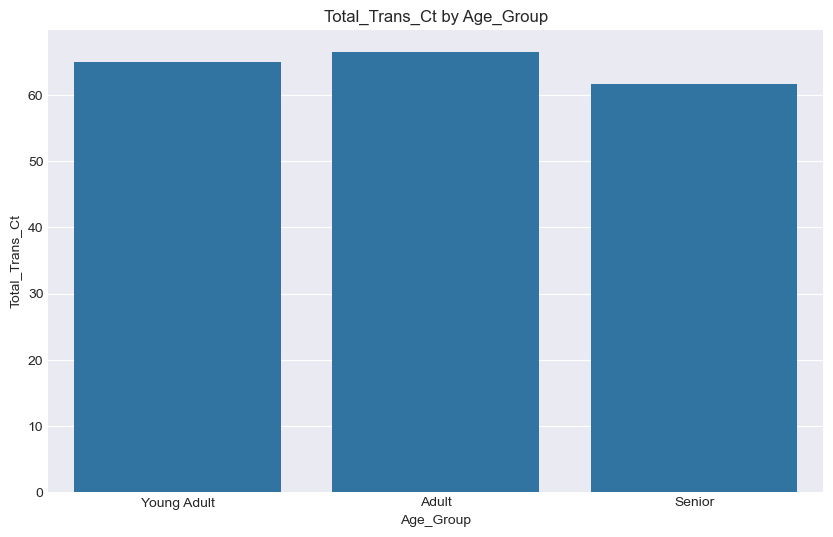

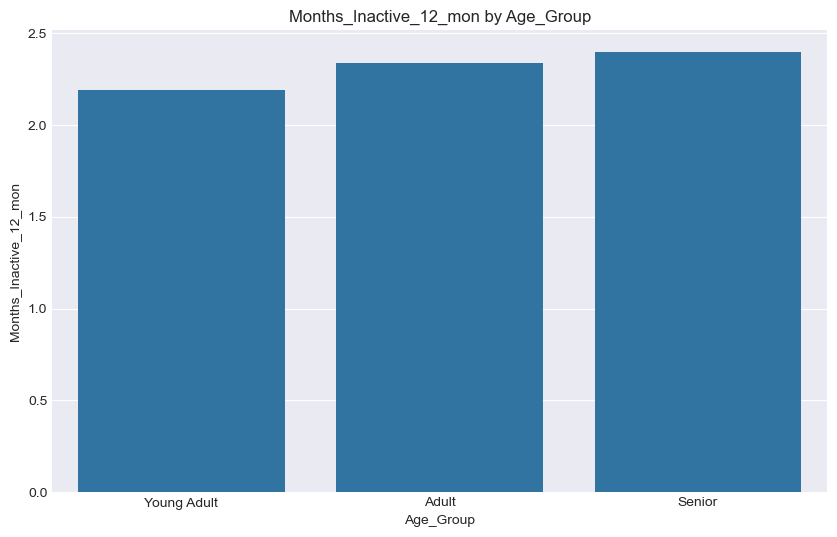

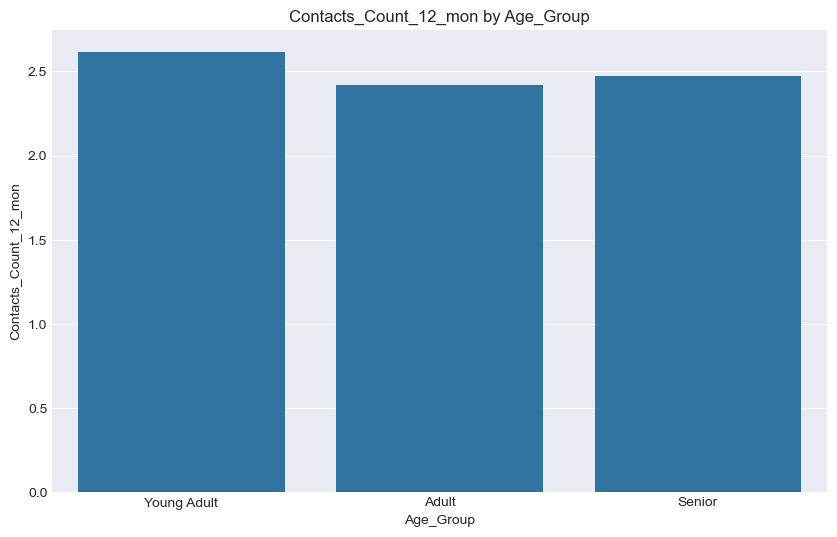

In [41]:
transEngColumns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in transEngColumns:
    finbar(df1, 'Age_Group', i)

## Customer Demographics

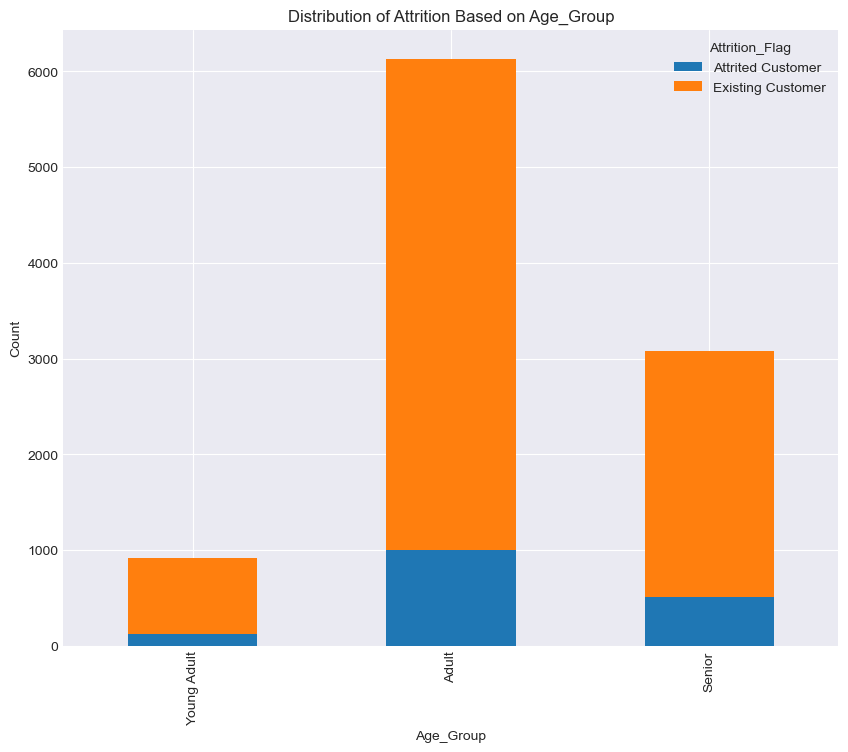

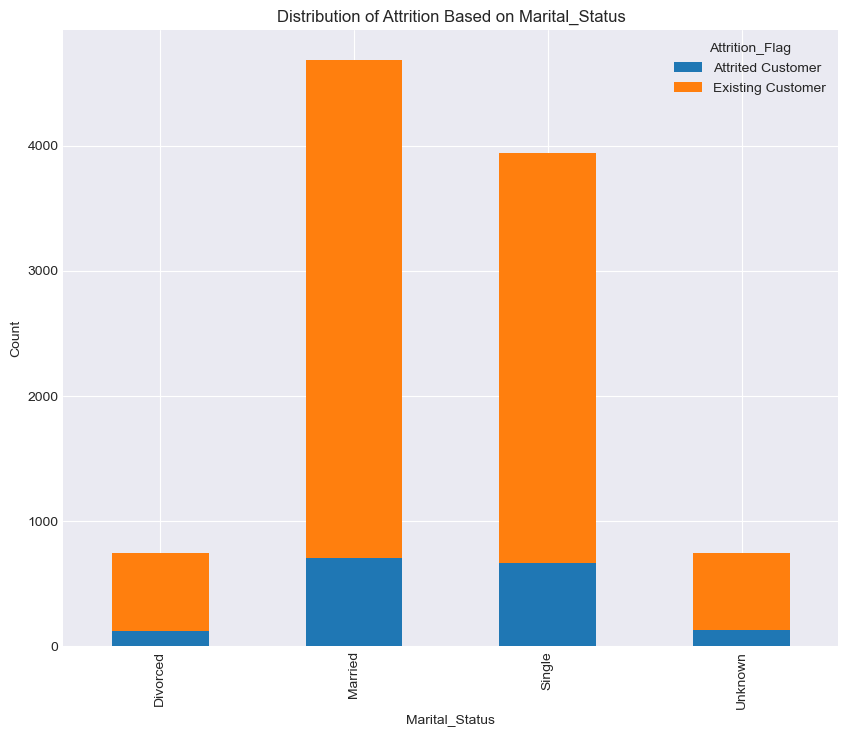

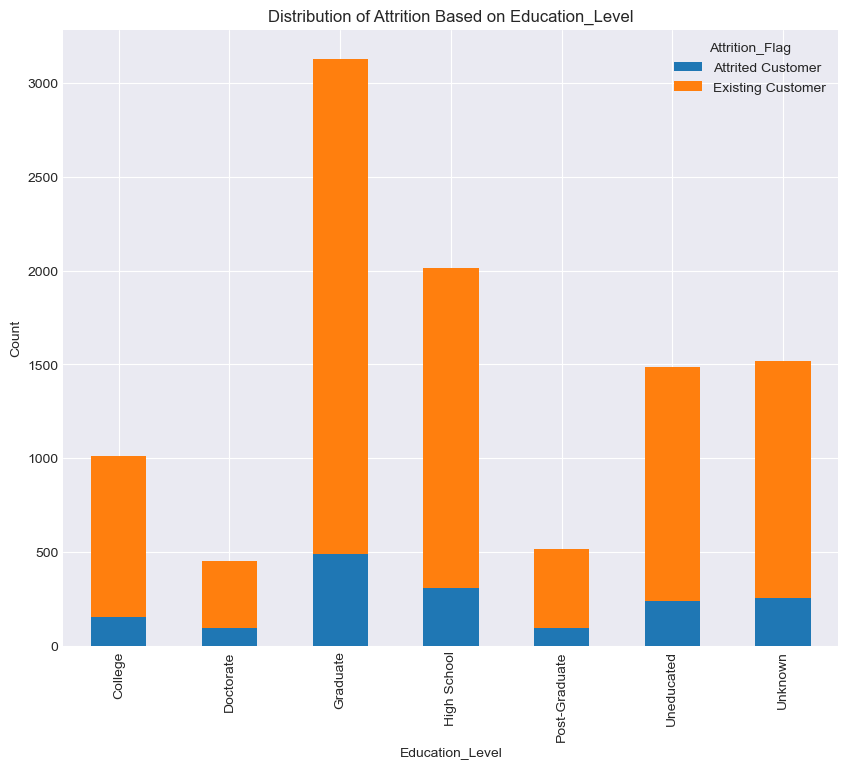

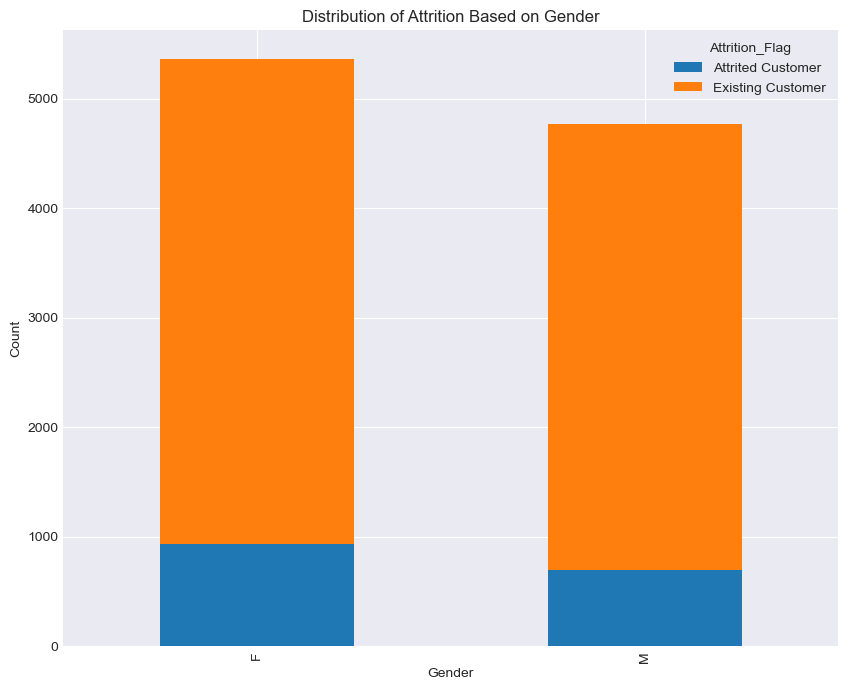

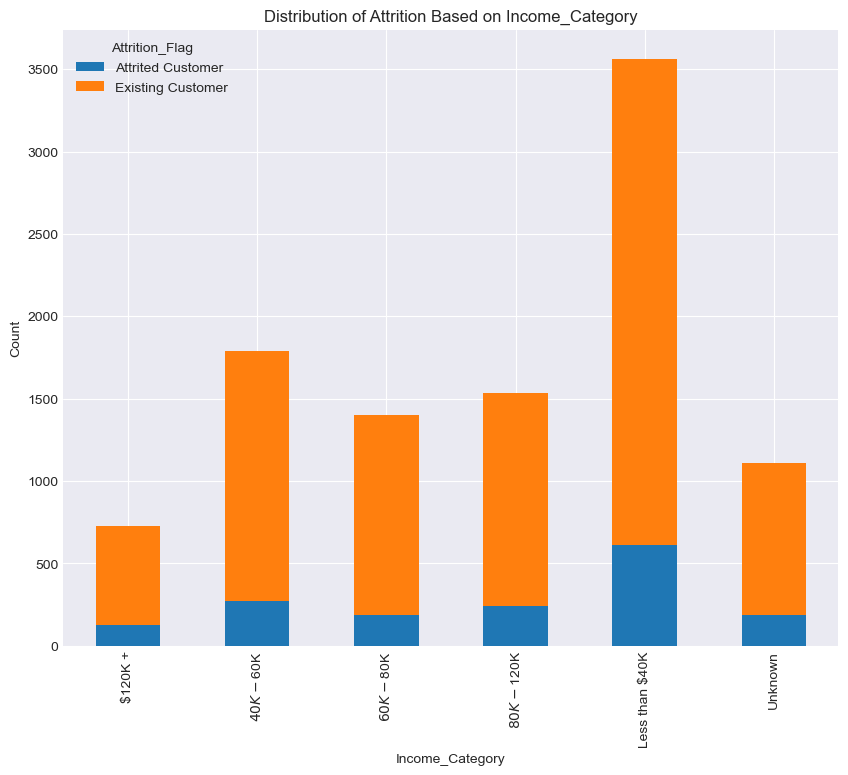

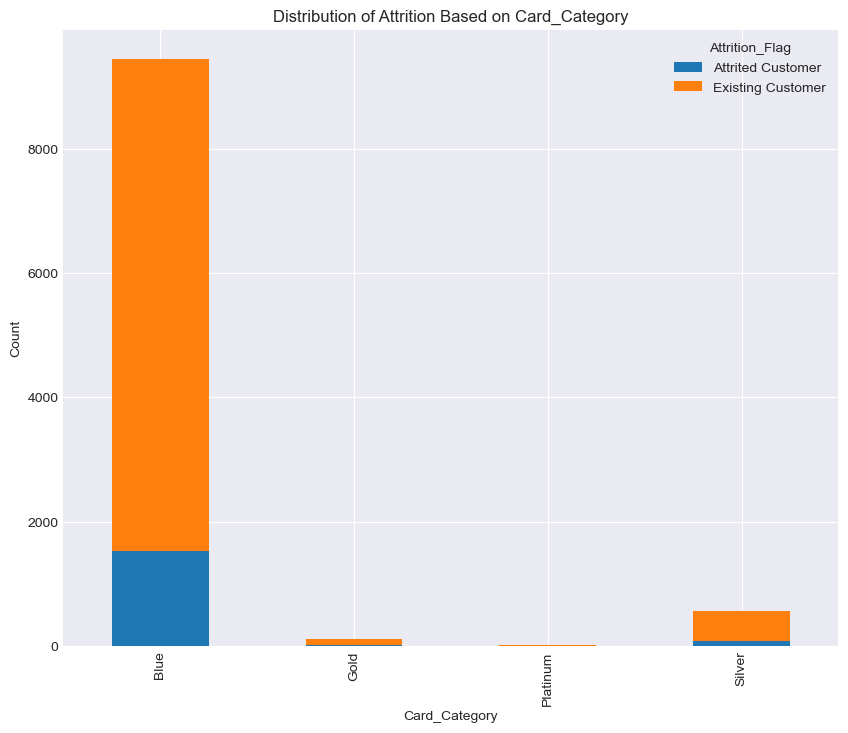

In [42]:
demoColumns = ['Age_Group', 'Marital_Status', 'Education_Level', 'Gender', 'Income_Category', 'Card_Category' ]
def churn(column):
        finChurn = df1.groupby([column, 'Attrition_Flag']).size().unstack()
        return finChurn.plot(kind='bar', stacked=True, figsize=(10,8), 
                             title = 'Distribution of Attrition Based on' + ' ' + i, xlabel = column, ylabel = 'Count')
for i in demoColumns:
    churn(i)  

In [43]:
df1['Months_on_book'].max()

56

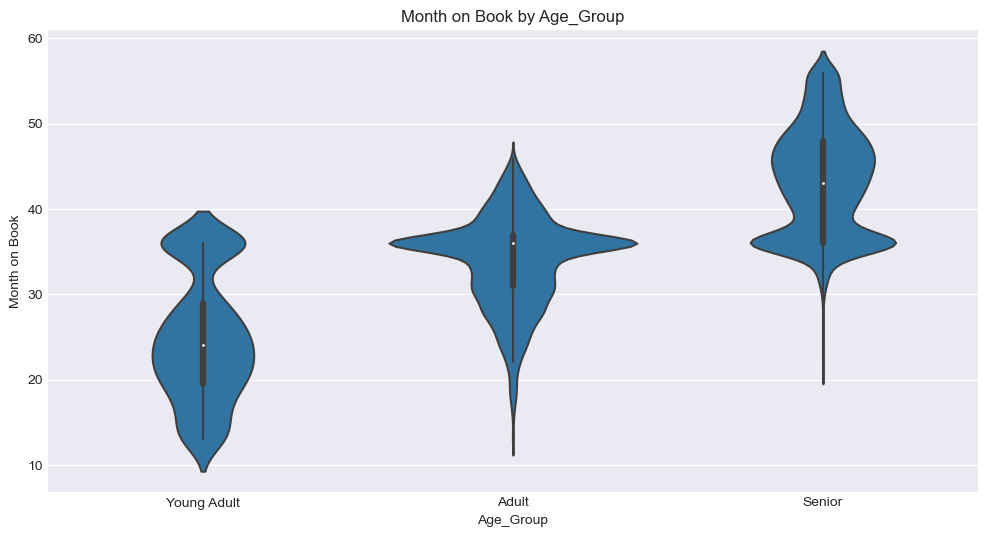

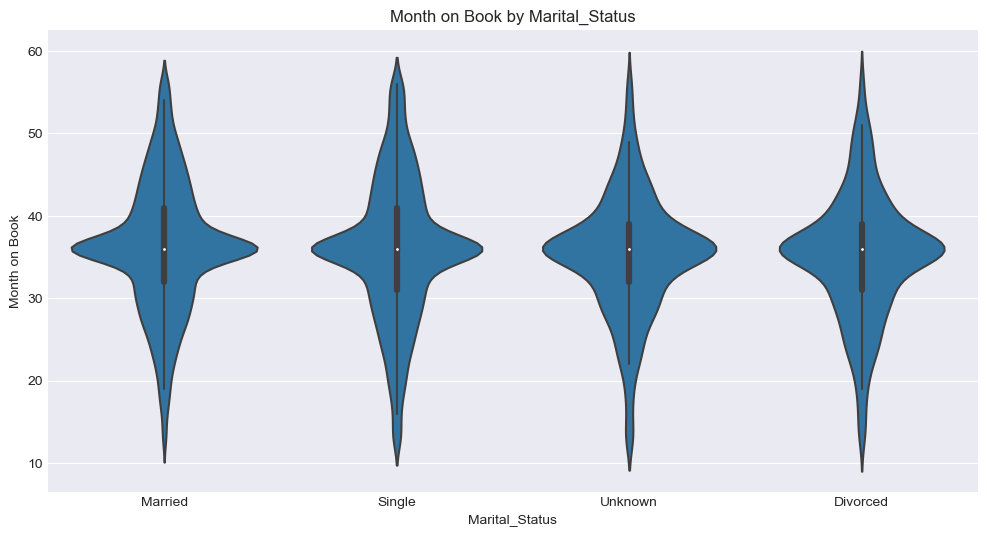

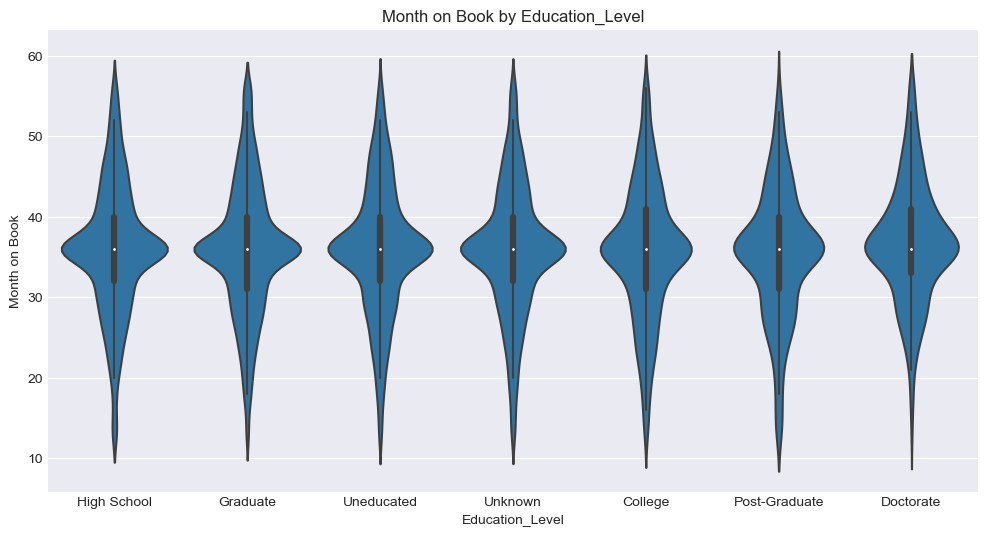

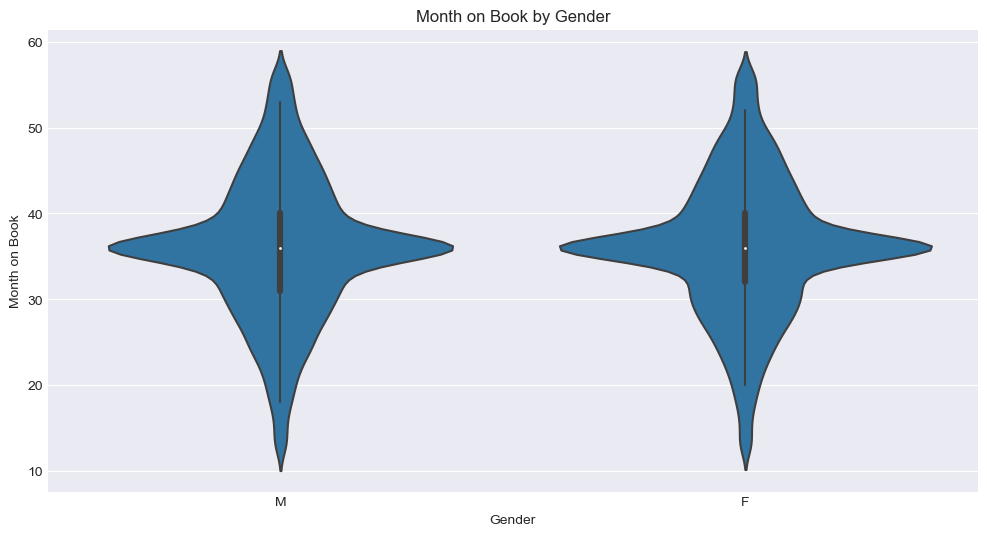

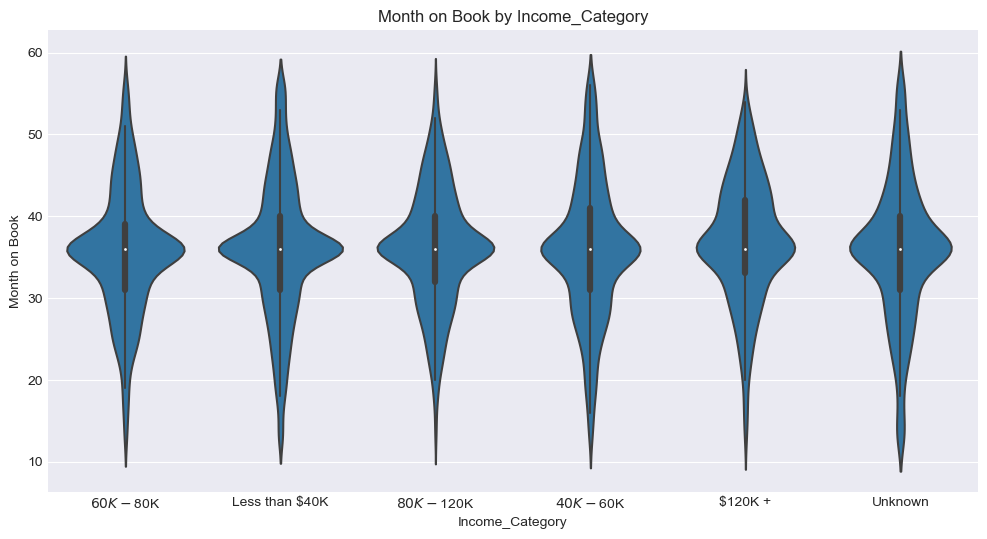

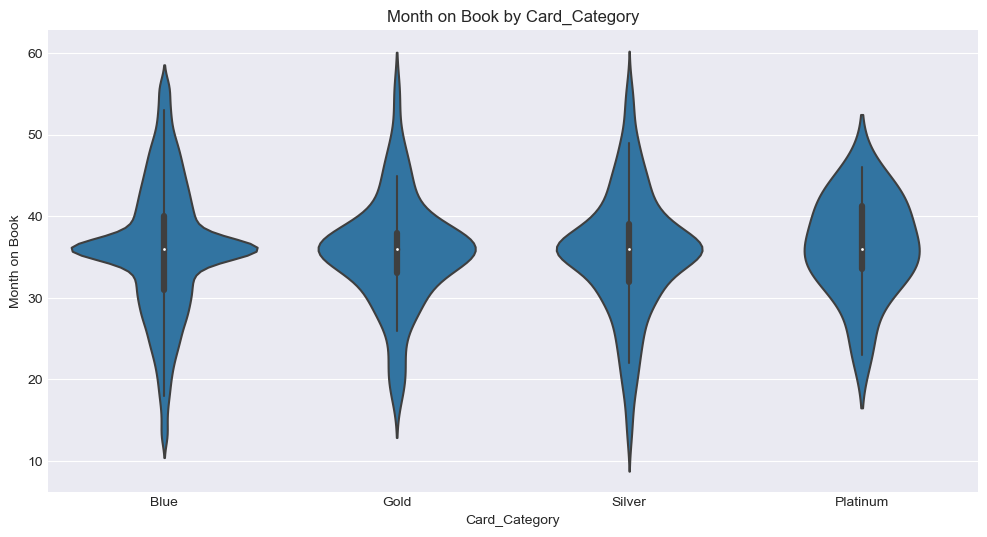

In [44]:
def violine(df, x):
    plt.figure(figsize= [12,6])
    color = sb.color_palette()[0]
    sb.violinplot(data= df1, y= 'Months_on_book', x= x, color= color)
    plt.title(f'Month on Book by {x}')
    plt.xlabel(x)
    plt.ylabel('Month on Book')
    
for i in demoColumns:
    violine(df1, i)  

<Figure size 2500x2000 with 0 Axes>

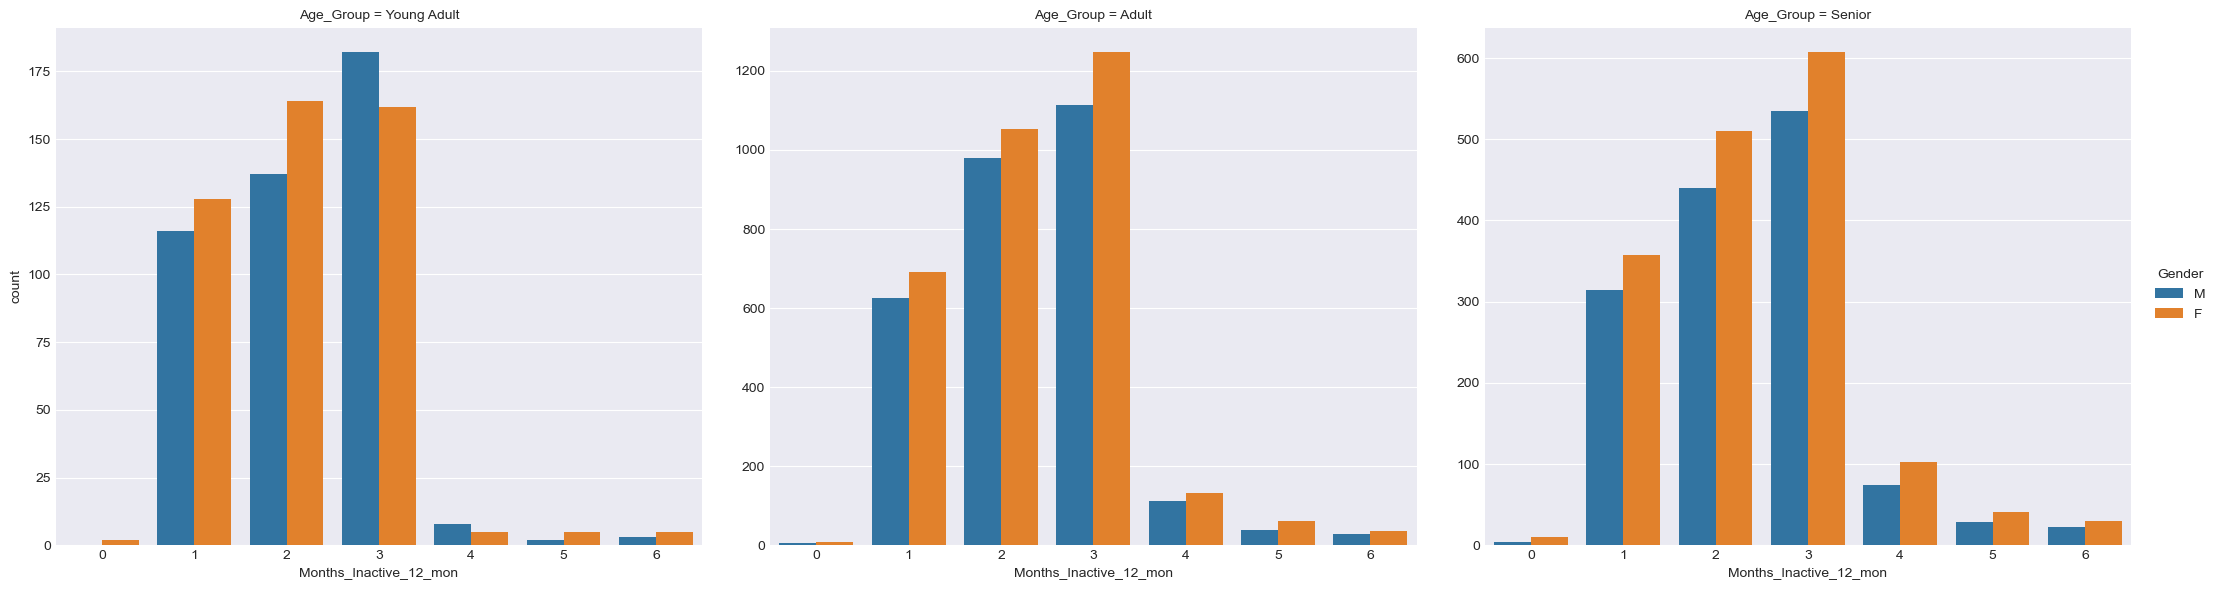

In [45]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Gender', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);
#plt.suptitle('Count of Months Inactive by Age Group and Gender', fontsize=18)
plt.show();

<Figure size 2500x2000 with 0 Axes>

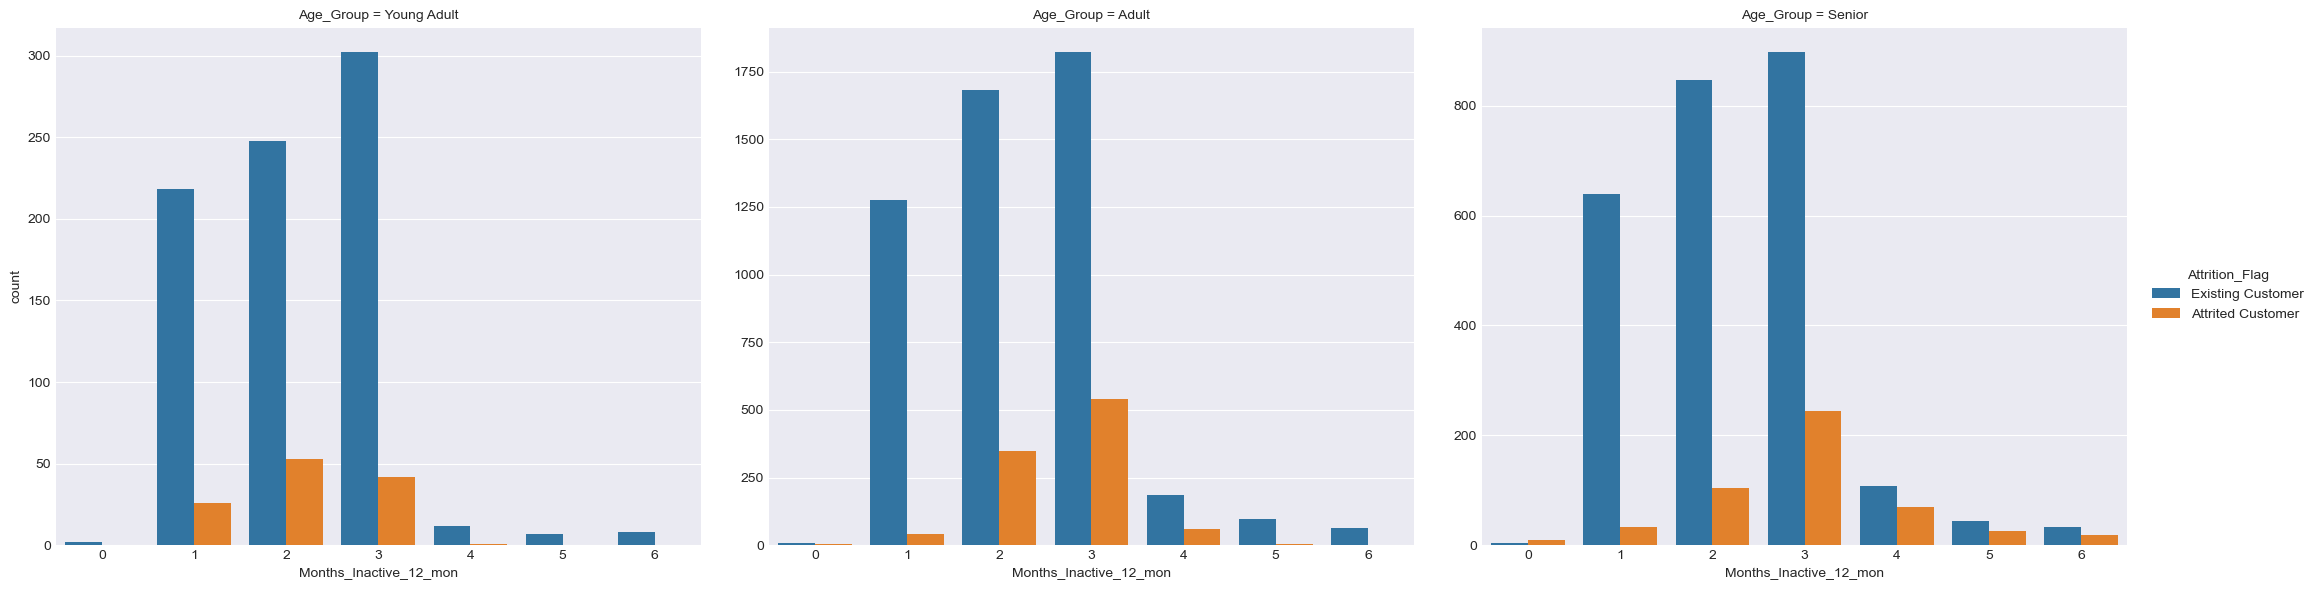

In [46]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);

In [47]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

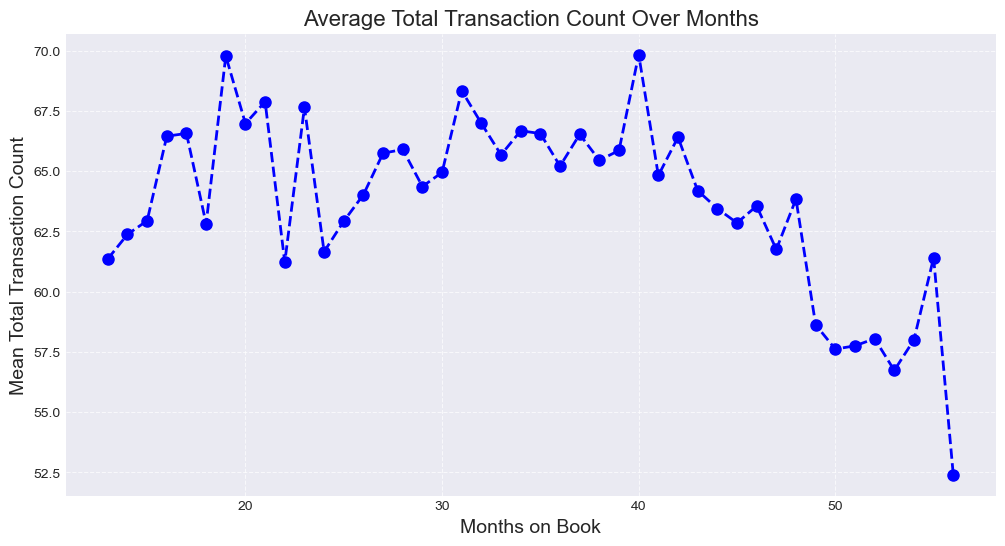

In [48]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Trans_Ct'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total Transaction Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

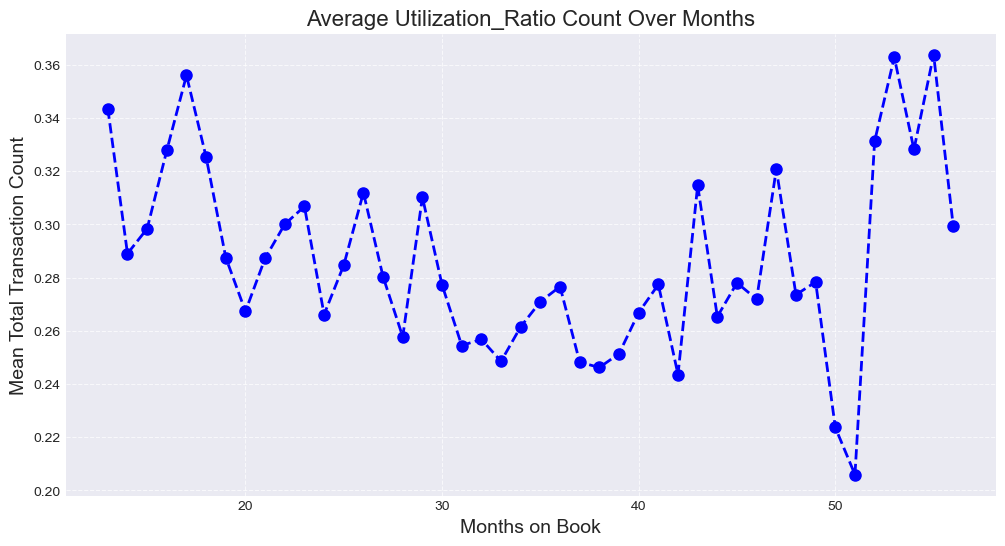

In [49]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Avg_Utilization_Ratio'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Utilization_Ratio Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

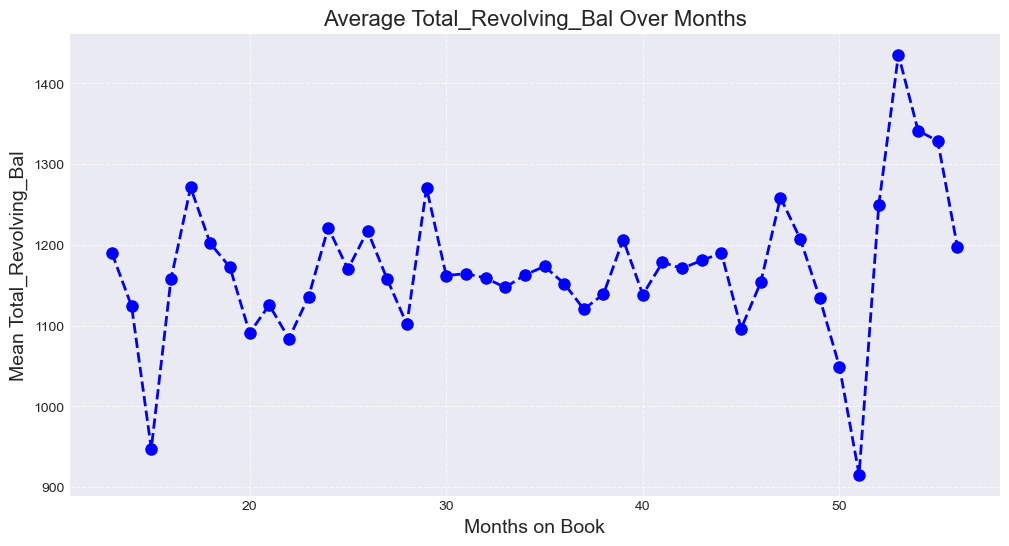

In [50]:
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Revolving_Bal'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total_Revolving_Bal Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total_Revolving_Bal', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

## Data Preprocessing

<Figure size 2500x2000 with 0 Axes>

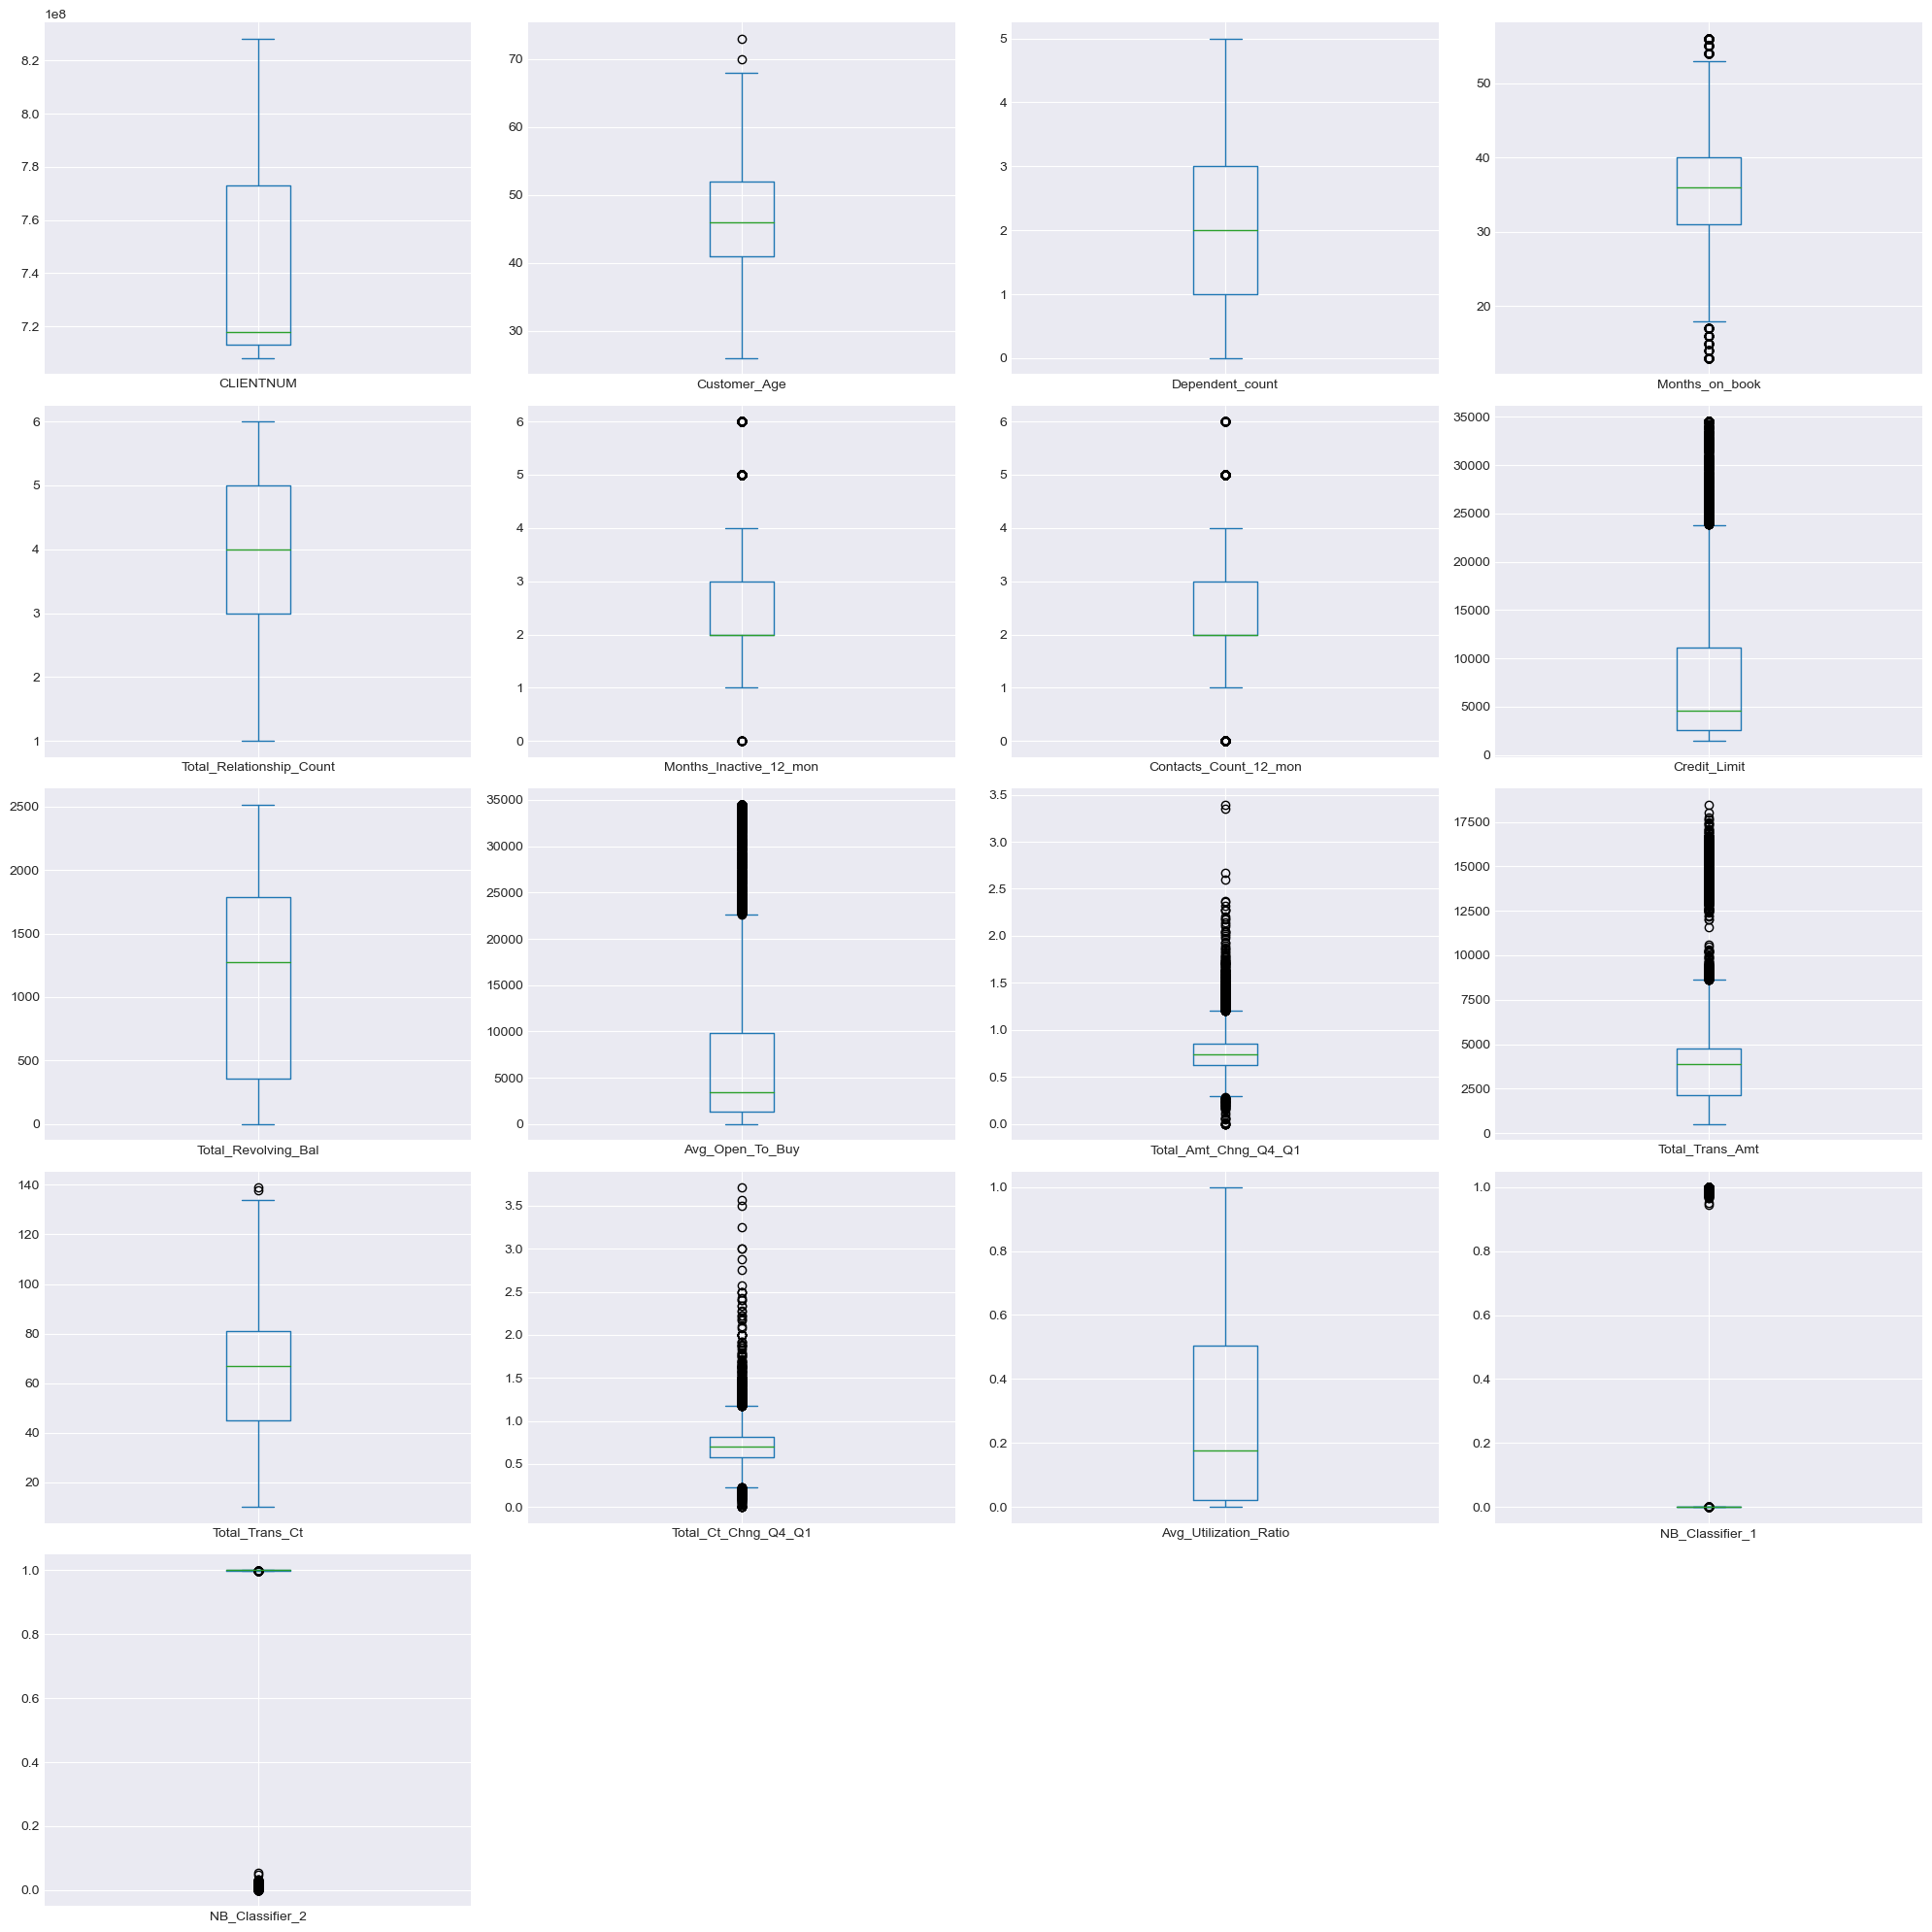

In [51]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

### Treating for Outliers

In [52]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [53]:
df1.shape

(10127, 24)

In [54]:
sample_outliers = detect_outliers_iqr(df1['Total_Trans_Amt'])
df1.drop(df1[df1['Total_Trans_Amt'].isin(sample_outliers)].index, inplace=True)

In [55]:
df1.shape

(9231, 24)

In [56]:
sample_outliers = detect_outliers_iqr(df1['Total_Amt_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Amt_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [57]:
df1.shape

(8855, 24)

In [58]:
sample_outliers = detect_outliers_iqr(df1['Total_Ct_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Ct_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [59]:
df1.shape

(8586, 24)

<Figure size 2500x2000 with 0 Axes>

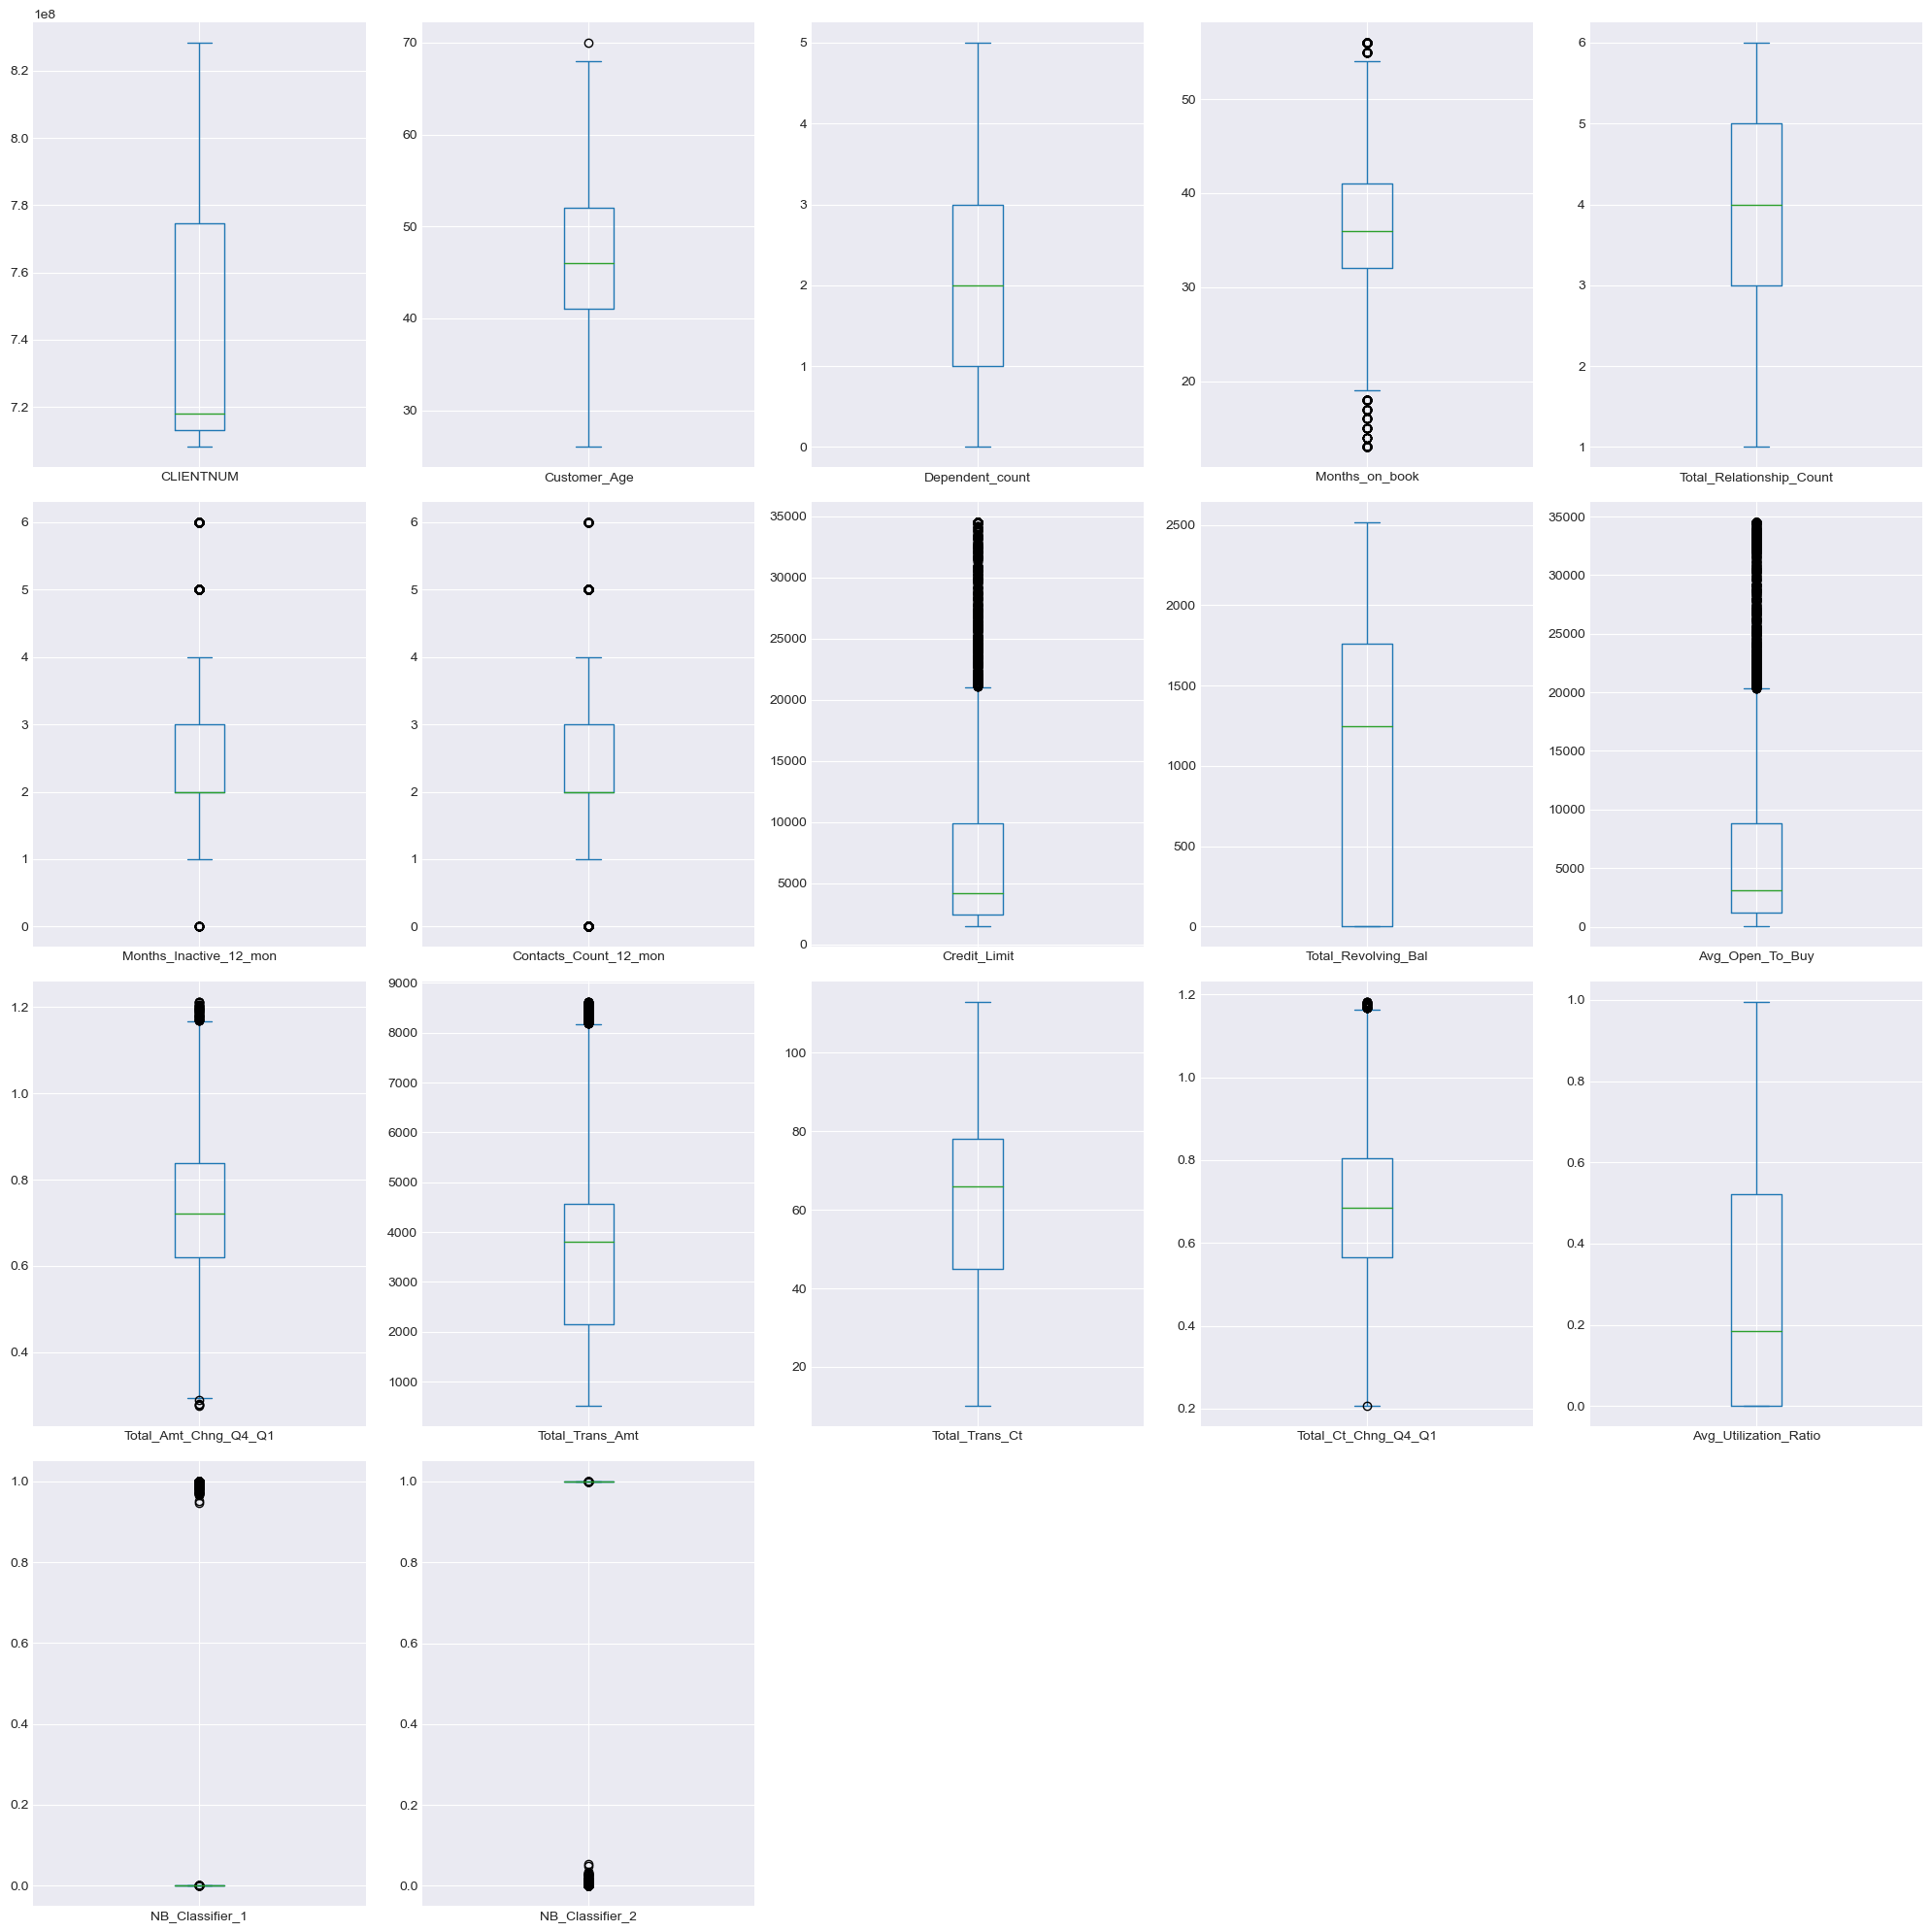

In [60]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

## Encoding

In [61]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

In [62]:
cate = df1.select_dtypes('object')
cate

Attrition_Flag Gender Education_Level Marital_Status  \
10     Existing Customer      M      Uneducated        Unknown   
14     Existing Customer      F        Graduate        Married   
19     Existing Customer      F        Graduate        Married   
20     Existing Customer      M       Doctorate       Divorced   
21     Attrited Customer      F        Graduate        Married   
...                  ...    ...             ...            ...   
10054  Attrited Customer      F       Doctorate         Single   
10067  Attrited Customer      F      Uneducated        Married   
10089  Attrited Customer      F         Unknown        Married   
10103  Attrited Customer      M     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   

      Income_Category Card_Category  
10            $120K +          Blue  
14     Less than $40K          Blue  
19            Unknown          Blue  
20        $60K - $80K          Blue  
21     Less than $40K          Blue  
...               ...           ...  
10054  Less than $40K          Blue  
10067     $40K - $60K          Blue  
10089  Less than $40K          Blue  
10103    $80K - $120K          Blue  
10125     $40K - $60K          Blue  

[8586 rows x 6 columns]

In [63]:
for i in cate.columns:
    print(i, cate[i].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['Uneducated' 'Graduate' 'Doctorate' 'Unknown' 'High School' 'College'
 'Post-Graduate']
Marital_Status ['Unknown' 'Married' 'Divorced' 'Single']
Income_Category ['$120K +' 'Less than $40K' 'Unknown' '$60K - $80K' '$80K - $120K'
 '$40K - $60K']
Card_Category ['Blue' 'Silver' 'Gold' 'Platinum']


In [64]:
df1['Age_Group'].unique()

['Adult', 'Senior', 'Young Adult']
Categories (3, object): ['Young Adult' < 'Adult' < 'Senior']

In [65]:
cate.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [66]:
df1['Education_Level'].unique()

array(['Uneducated', 'Graduate', 'Doctorate', 'Unknown', 'High School',
       'College', 'Post-Graduate'], dtype=object)

In [67]:
df1['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [68]:
df1.groupby('Attrition_Flag').size()

Attrition_Flag
Attrited Customer    1438
Existing Customer    7148
dtype: int64

In [69]:
feature = [f for f in df1.columns if f != 'Attrition_Flag']
target =  [t for t in df1.columns if t == 'Attrition_Flag']

X = df1[feature]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.20, random_state=42)

## ENCODING EDUCATION LEVEL

In [70]:
 # Define the order of categories
education_order = ['Unknown','Uneducated', 'College', 'Graduate', 'High School', 'Post-Graduate', 'Doctorate']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_order]).fit(X_train[['Education_Level']])

# Fit and transform on the training data
X_train['Education_Level'] = ordinal_encoder.transform(X_train[['Education_Level']])

# Transform the test data using the same encoder
X_test['Education_Level'] = ordinal_encoder.transform(X_test[['Education_Level']])


## ENCODING MARITAL STATUS

In [71]:
# Define the order of categories
marital_order = ['Unknown','Single', 'Married', 'Divorced']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[marital_order]).fit(X_train[['Marital_Status']])

# Fit and transform on the training data
X_train['Marital_Status'] = ordinal_encoder.transform(X_train[['Marital_Status']])

# Transform the test data using the same encoder
X_test['Marital_Status'] = ordinal_encoder.transform(X_test[['Marital_Status']])


## ENCODING INCOME CATEGORY

In [72]:
# Define the order of categories
income_order = ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K', 
       '$80K - $120K', '$120K +']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[income_order]).fit(X_train[['Income_Category']])

# Fit and transform on the training data
X_train['Income_Category'] = ordinal_encoder.transform(X_train[['Income_Category']])

# Transform the test data using the same encoder
X_test['Income_Category'] = ordinal_encoder.transform(X_test[['Income_Category']])

## ENCODING INCOME CATEGORY

In [73]:
# Define the order of categories
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[card_order]).fit(X_train[['Card_Category']])

# Fit and transform on the training data
X_train['Card_Category'] = ordinal_encoder.transform(X_train[['Card_Category']])

# Transform the test data using the same encoder
X_test['Card_Category'] = ordinal_encoder.transform(X_test[['Card_Category']])


## ENCODING INCOME AGE GROUP

In [74]:
# Define the order of categories
age_order = ['Adult', 'Senior', 'Young Adult']

# Initialize the OrdinalEncoder with the specified order
Age_ordinal_encoder = OrdinalEncoder(categories=[age_order]).fit(X_train[['Age_Group']])

# Fit and transform on the training data
X_train['Age_Group'] = Age_ordinal_encoder.transform(X_train[['Age_Group']])

# Transform the test data using the same encoder
X_test['Age_Group'] = Age_ordinal_encoder.transform(X_test[['Age_Group']])

## LABEL ENCODNG

In [75]:
# Initialize the Binarizer
binarizer = LabelBinarizer().fit(X_train['Gender'])
X_train['Gender']= binarizer.transform(X_train['Gender'])

X_test['Gender'] = binarizer.transform(X_test['Gender'])

In [76]:
y_train['Attrition_Flag'] = y_train['Attrition_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0 )
y_test['Attrition_Flag'] = y_test['Attrition_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0 )

In [77]:
y_test['Attrition_Flag'].unique()

array([0, 1], dtype=int64)

In [78]:
y_train['Attrition_Flag'].unique()

array([1, 0], dtype=int64)

In [79]:
 X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 5686 to 7893
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 6868 non-null   int64  
 1   Customer_Age              6868 non-null   int64  
 2   Gender                    6868 non-null   int32  
 3   Dependent_count           6868 non-null   int64  
 4   Education_Level           6868 non-null   float64
 5   Marital_Status            6868 non-null   float64
 6   Income_Category           6868 non-null   float64
 7   Card_Category             6868 non-null   float64
 8   Months_on_book            6868 non-null   int64  
 9   Total_Relationship_Count  6868 non-null   int64  
 10  Months_Inactive_12_mon    6868 non-null   int64  
 11  Contacts_Count_12_mon     6868 non-null   int64  
 12  Credit_Limit              6868 non-null   float64
 13  Total_Revolving_Bal       6868 non-null   int64  
 14  Avg_O

In [80]:
y_train['Attrition_Flag'].value_counts()

0    5717
1    1151
Name: Attrition_Flag, dtype: int64

In [81]:
oversample = SMOTE()
#oversamling for train data
transformed_X_train, transformed_y_train = oversample.fit_resample(X_train, y_train)

#oversamling for test data
transformed_X_test, transformed_y_test = oversample.fit_resample(X_test, y_test)

In [82]:
transformed_y_train['Attrition_Flag'].value_counts()

1    5717
0    5717
Name: Attrition_Flag, dtype: int64

In [83]:
X_train = transformed_X_train.values
X_test = transformed_X_test.values
y_train = transformed_y_train.values
y_test = transformed_y_test.values




In [84]:
Xtrain_df = pd.DataFrame(X_train, columns = feature)
Xtrain_df.describe().T

count          mean           std           min  \
CLIENTNUM                 11434.0  7.385478e+08  3.687847e+07  7.080855e+08   
Customer_Age              11434.0  4.647245e+01  7.215176e+00  2.600000e+01   
Gender                    11434.0  3.340038e-01  4.716617e-01  0.000000e+00   
Dependent_count           11434.0  2.227392e+00  1.220928e+00  0.000000e+00   
Education_Level           11434.0  2.624221e+00  1.543679e+00  0.000000e+00   
Marital_Status            11434.0  1.519713e+00  6.829892e-01  0.000000e+00   
Income_Category           11434.0  2.011484e+00  1.358637e+00  0.000000e+00   
Card_Category             11434.0  6.928543e-02  2.861386e-01  0.000000e+00   
Months_on_book            11434.0  3.601539e+01  7.285852e+00  1.300000e+01   
Total_Relationship_Count  11434.0  3.523876e+00  1.501508e+00  1.000000e+00   
Months_Inactive_12_mon    11434.0  2.386654e+00  9.126842e-01  0.000000e+00   
Contacts_Count_12_mon     11434.0  2.492391e+00  1.034515e+00  0.000000e+00   
Credit_Limit              11434.0  7.690725e+03  8.057978e+03  1.438300e+03   
Total_Revolving_Bal       11434.0  9.518383e+02  8.188724e+02  0.000000e+00   
Avg_Open_To_Buy           11434.0  6.738749e+03  8.050766e+03  1.000000e+01   
Total_Amt_Chng_Q4_Q1      11434.0  7.176670e-01  1.649764e-01  2.750000e-01   
Total_Trans_Amt           11434.0  3.268189e+03  1.640157e+03  5.100000e+02   
Total_Trans_Ct            11434.0  5.493196e+01  1.891912e+01  1.000000e+01   
Total_Ct_Chng_Q4_Q1       11434.0  6.340179e-01  1.827362e-01  2.060000e-01   
Avg_Utilization_Ratio     11434.0  2.393258e-01  2.647656e-01  0.000000e+00   
NB_Classifier_1           11434.0  4.975048e-01  4.973441e-01  7.664200e-06   
NB_Classifier_2           11434.0  5.024952e-01  4.973441e-01  4.199800e-04   
Age_Group                 11434.0  4.616570e-01  5.913809e-01  0.000000e+00   

                                   25%           50%           75%  \
CLIENTNUM                 7.127733e+08  7.174884e+08  7.725040e+08   
Customer_Age              4.200000e+01  4.600000e+01  5.100000e+01   
Gender                    0.000000e+00  0.000000e+00  1.000000e+00   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Education_Level           1.181922e+00  3.000000e+00  3.966007e+00   
Marital_Status            1.000000e+00  1.643461e+00  2.000000e+00   
Income_Category           1.000000e+00  1.876908e+00  3.000000e+00   
Card_Category             0.000000e+00  0.000000e+00  0.000000e+00   
Months_on_book            3.200000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  2.000000e+00  3.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  3.000000e+00  3.000000e+00   
Credit_Limit              2.494037e+03  4.332709e+03  9.358154e+03   
Total_Revolving_Bal       0.000000e+00  9.300000e+02  1.620000e+03   
Avg_Open_To_Buy           1.480347e+03  3.454000e+03  8.436405e+03   
Total_Amt_Chng_Q4_Q1      6.040000e-01  7.134423e-01  8.290000e-01   
Total_Trans_Amt           2.060000e+03  2.693000e+03  4.351750e+03   
Total_Trans_Ct            4.000000e+01  5.000000e+01  7.100000e+01   
Total_Ct_Chng_Q4_Q1       5.000000e-01  6.276727e-01  7.560000e-01   
Avg_Utilization_Ratio     0.000000e+00  1.319404e-01  4.303637e-01   
NB_Classifier_1           1.597100e-04  4.736006e-01  9.956566e-01   
NB_Classifier_2           4.342414e-03  5.264000e-01  9.998400e-01   
Age_Group                 0.000000e+00  0.000000e+00  1.000000e+00   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              6.800000e+01  
Gender                    1.000000e+00  
Dependent_count           5.000000e+00  
Education_Level           6.000000e+00  
Marital_Status            3.000000e+00  
Income_Category           5.000000e+00  
Card_Category             3.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  

In [85]:
#Rescaling
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train)
R_Xtrain = scaler.transform(X_train)
R_Xtest = scaler.transform(X_test)

In [86]:
R_Xtrain_df = pd.DataFrame(R_Xtrain, columns = feature)
R_Xtrain_df.describe().T

count      mean       std  min       25%  \
CLIENTNUM                 11434.0  0.253309  0.306662  0.0  0.038981   
Customer_Age              11434.0  0.487439  0.171790  0.0  0.380952   
Gender                    11434.0  0.334004  0.471662  0.0  0.000000   
Dependent_count           11434.0  0.445478  0.244186  0.0  0.200000   
Education_Level           11434.0  0.437370  0.257280  0.0  0.196987   
Marital_Status            11434.0  0.506571  0.227663  0.0  0.333333   
Income_Category           11434.0  0.402297  0.271727  0.0  0.200000   
Card_Category             11434.0  0.023095  0.095380  0.0  0.000000   
Months_on_book            11434.0  0.535242  0.169438  0.0  0.441860   
Total_Relationship_Count  11434.0  0.504775  0.300302  0.0  0.200000   
Months_Inactive_12_mon    11434.0  0.397776  0.152114  0.0  0.333333   
Contacts_Count_12_mon     11434.0  0.415399  0.172419  0.0  0.333333   
Credit_Limit              11434.0  0.189022  0.243608  0.0  0.031917   
Total_Revolving_Bal       11434.0  0.378164  0.325337  0.0  0.000000   
Avg_Open_To_Buy           11434.0  0.195002  0.233315  0.0  0.042611   
Total_Amt_Chng_Q4_Q1      11434.0  0.472430  0.176069  0.0  0.351121   
Total_Trans_Amt           11434.0  0.340181  0.202289  0.0  0.191169   
Total_Trans_Ct            11434.0  0.436233  0.183681  0.0  0.291262   
Total_Ct_Chng_Q4_Q1       11434.0  0.438543  0.187230  0.0  0.301230   
Avg_Utilization_Ratio     11434.0  0.240528  0.266096  0.0  0.000000   
NB_Classifier_1           11434.0  0.497710  0.497557  0.0  0.000152   
NB_Classifier_2           11434.0  0.502291  0.497558  0.0  0.003924   
Age_Group                 11434.0  0.230828  0.295690  0.0  0.000000   

                               50%       75%  max  
CLIENTNUM                 0.078190  0.535671  1.0  
Customer_Age              0.476190  0.595238  1.0  
Gender                    0.000000  1.000000  1.0  
Dependent_count           0.400000  0.600000  1.0  
Education_Level           0.500000  0.661001  1.0  
Marital_Status            0.547820  0.666667  1.0  
Income_Category           0.375382  0.600000  1.0  
Card_Category             0.000000  0.000000  1.0  
Months_on_book            0.534884  0.627907  1.0  
Total_Relationship_Count  0.400000  0.800000  1.0  
Months_Inactive_12_mon    0.333333  0.500000  1.0  
Contacts_Count_12_mon     0.500000  0.500000  1.0  
Credit_Limit              0.087503  0.239432  1.0  
Total_Revolving_Bal       0.369487  0.643623  1.0  
Avg_Open_To_Buy           0.099809  0.244201  1.0  
Total_Amt_Chng_Q4_Q1      0.467921  0.591249  1.0  
Total_Trans_Amt           0.269240  0.473822  1.0  
Total_Trans_Ct            0.388350  0.592233  1.0  
Total_Ct_Chng_Q4_Q1       0.432042  0.563525  1.0  
Avg_Utilization_Ratio     0.132603  0.432526  1.0  
NB_Classifier_1           0.473796  0.996075  1.0  
NB_Classifier_2           0.526206  0.999850  1.0  
Age_Group                 0.000000  0.500000  1.0

<Figure size 2500x2000 with 0 Axes>

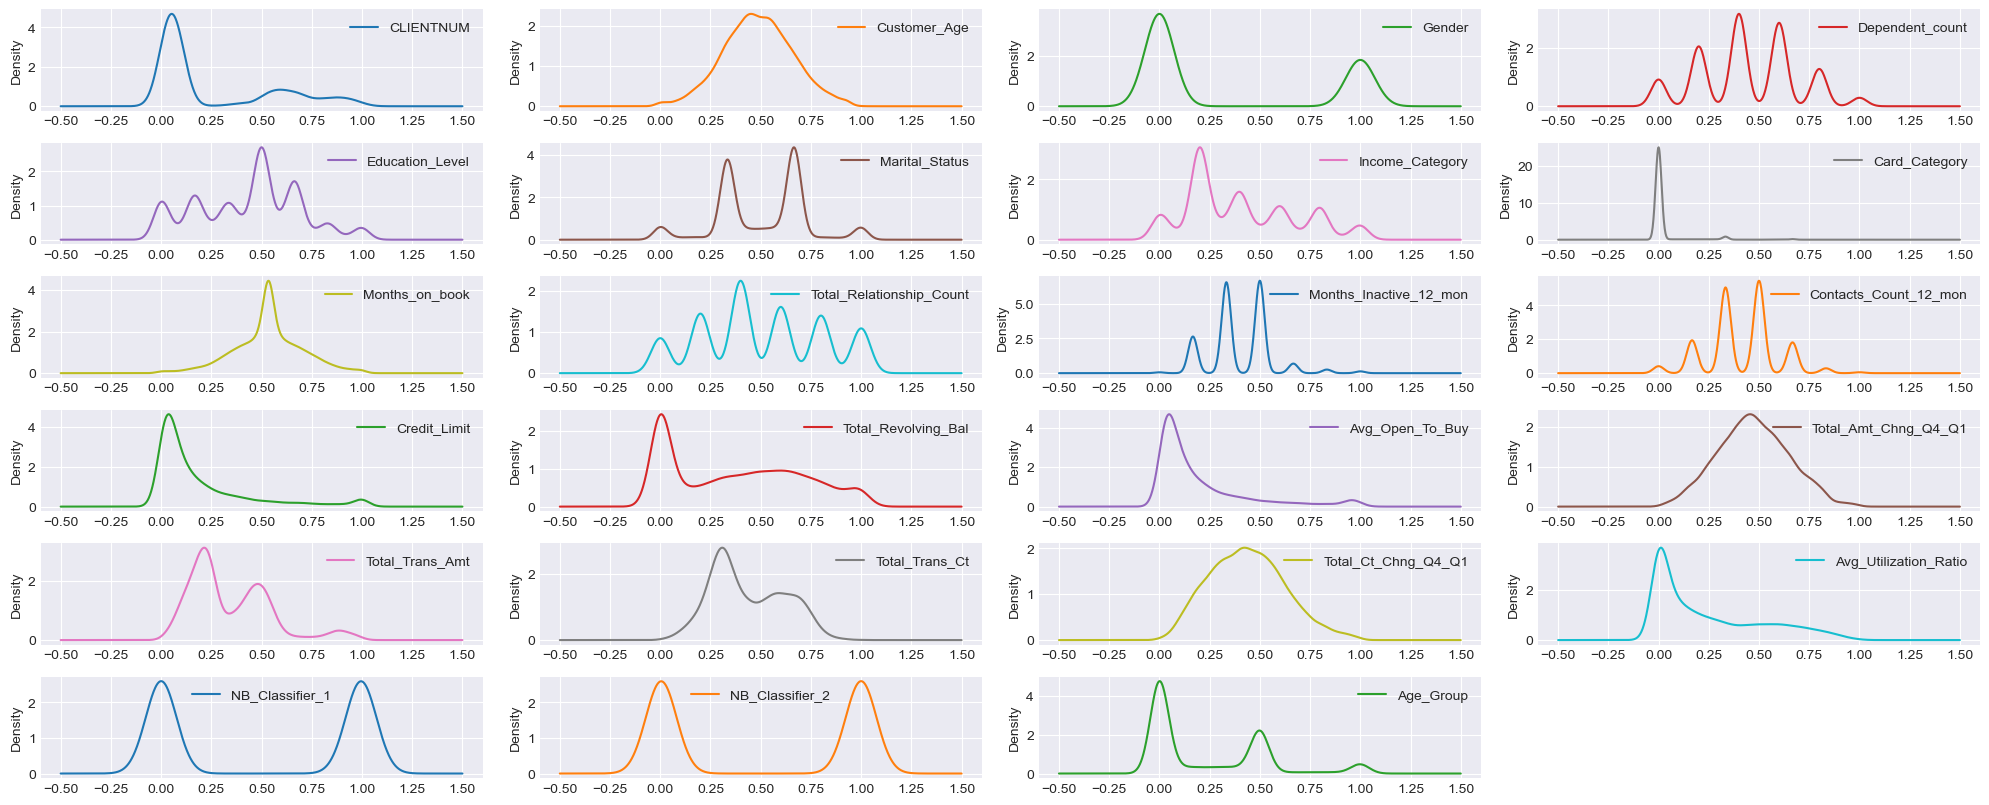

In [87]:
plt.figure(figsize=(25, 20), dpi= 100)
R_Xtrain_df.plot(kind='density', subplots=True, layout=(15,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

In [88]:
#Normalizer
normalizer = Normalizer().fit(R_Xtrain)
NR_Xtrain = scaler.transform(R_Xtrain)
NR_Xtest = scaler.transform(R_Xtest)

In [89]:
NR_Xtrain_df = pd.DataFrame(NR_Xtrain, columns = feature)
NR_Xtrain_df.describe().T

count      mean           std       min       25%  \
CLIENTNUM                 11434.0 -5.888071  2.550044e-09 -5.888071 -5.888071   
Customer_Age              11434.0 -0.607442  4.090236e-03 -0.619048 -0.609977   
Gender                    11434.0  0.334004  4.716617e-01  0.000000  0.000000   
Dependent_count           11434.0  0.089096  4.883713e-02  0.000000  0.040000   
Education_Level           11434.0  0.072895  4.287998e-02  0.000000  0.032831   
Marital_Status            11434.0  0.168857  7.588769e-02  0.000000  0.111111   
Income_Category           11434.0  0.080459  5.434550e-02  0.000000  0.040000   
Card_Category             11434.0  0.007698  3.179317e-02  0.000000  0.000000   
Months_on_book            11434.0 -0.289878  3.940428e-03 -0.302326 -0.292050   
Total_Relationship_Count  11434.0 -0.099045  6.006030e-02 -0.200000 -0.160000   
Months_Inactive_12_mon    11434.0  0.066296  2.535234e-02  0.000000  0.055556   
Contacts_Count_12_mon     11434.0  0.069233  2.873653e-02  0.000000  0.055556   
Credit_Limit              11434.0 -0.043477  7.364707e-06 -0.043482 -0.043482   
Total_Revolving_Bal       11434.0  0.000150  1.292557e-04  0.000000  0.000000   
Avg_Open_To_Buy           11434.0 -0.000284  6.761577e-06 -0.000290 -0.000289   
Total_Amt_Chng_Q4_Q1      11434.0  0.210705  1.879068e-01 -0.293490  0.081239   
Total_Trans_Amt           11434.0 -0.062859  2.494928e-05 -0.062901 -0.062877   
Total_Trans_Ct            11434.0 -0.092852  1.783308e-03 -0.097087 -0.094260   
Total_Ct_Chng_Q4_Q1       11434.0  0.238261  1.918337e-01 -0.211066  0.097571   
Avg_Utilization_Ratio     11434.0  0.241737  2.674333e-01  0.000000  0.000000   
NB_Classifier_1           11434.0  0.497915  4.977698e-01 -0.000008  0.000145   
NB_Classifier_2           11434.0  0.502087  4.977721e-01 -0.000420  0.003506   
Age_Group                 11434.0  0.115414  1.478452e-01  0.000000  0.000000   

                               50%       75%           max  
CLIENTNUM                -5.888071 -5.888071 -5.888071e+00  
Customer_Age             -0.607710 -0.604875 -5.952381e-01  
Gender                    0.000000  1.000000  1.000000e+00  
Dependent_count           0.080000  0.120000  2.000000e-01  
Education_Level           0.083333  0.110167  1.666667e-01  
Marital_Status            0.182607  0.222222  3.333333e-01  
Income_Category           0.075076  0.120000  2.000000e-01  
Card_Category             0.000000  0.000000  3.333333e-01  
Months_on_book           -0.289886 -0.287723 -2.790698e-01  
Total_Relationship_Count -0.120000 -0.040000  5.551115e-17  
Months_Inactive_12_mon    0.055556  0.083333  1.666667e-01  
Contacts_Count_12_mon     0.083333  0.083333  1.666667e-01  
Credit_Limit             -0.043480 -0.043475 -4.345224e-02  
Total_Revolving_Bal       0.000147  0.000256  3.972984e-04  
Avg_Open_To_Buy          -0.000287 -0.000283 -2.608242e-04  
Total_Amt_Chng_Q4_Q1      0.205893  0.337512  7.737460e-01  
Total_Trans_Amt          -0.062868 -0.062842 -6.277750e-02  
Total_Trans_Ct           -0.093317 -0.091338 -8.737864e-02  
Total_Ct_Chng_Q4_Q1       0.231600  0.366316  8.135246e-01  
Avg_Utilization_Ratio     0.133270  0.434700  1.005025e+00  
NB_Classifier_1           0.473991  0.996493  1.000420e+00  
NB_Classifier_2           0.526012  0.999860  1.000010e+00  
Age_Group                 0.000000  0.250000  5.000000e-01

In [90]:
NR_Xtest_df = pd.DataFrame(NR_Xtest, columns = feature)
NR_Xtest_df.describe().T

count      mean           std       min       25%  \
CLIENTNUM                 2862.0 -5.888071  2.462801e-09 -5.888071 -5.888071   
Customer_Age              2862.0 -0.607389  4.178897e-03 -0.619048 -0.609977   
Gender                    2862.0  0.339623  4.736639e-01  0.000000  0.000000   
Dependent_count           2862.0  0.088400  4.721859e-02  0.000000  0.040000   
Education_Level           2862.0  0.072288  4.267297e-02  0.000000  0.032531   
Marital_Status            2862.0  0.169264  8.037236e-02  0.000000  0.111111   
Income_Category           2862.0  0.080497  5.505955e-02  0.000000  0.040000   
Card_Category             2862.0  0.008244  3.230912e-02  0.000000  0.000000   
Months_on_book            2862.0 -0.289822  4.072852e-03 -0.302326 -0.292050   
Total_Relationship_Count  2862.0 -0.098407  5.996135e-02 -0.200000 -0.160000   
Months_Inactive_12_mon    2862.0  0.064368  2.607984e-02  0.000000  0.055556   
Contacts_Count_12_mon     2862.0  0.072434  2.821778e-02  0.000000  0.055556   
Credit_Limit              2862.0 -0.043476  7.685717e-06 -0.043482 -0.043481   
Total_Revolving_Bal       2862.0  0.000150  1.329284e-04  0.000000  0.000000   
Avg_Open_To_Buy           2862.0 -0.000284  7.110359e-06 -0.000290 -0.000289   
Total_Amt_Chng_Q4_Q1      2862.0  0.212184  1.868638e-01 -0.288934  0.082378   
Total_Trans_Amt           2862.0 -0.062858  2.677230e-05 -0.062901 -0.062878   
Total_Trans_Ct            2862.0 -0.092880  1.840098e-03 -0.097087 -0.094354   
Total_Ct_Chng_Q4_Q1       2862.0  0.236755  1.908443e-01 -0.205817  0.097571   
Avg_Utilization_Ratio     2862.0  0.235108  2.699186e-01  0.000000  0.000000   
NB_Classifier_1           2862.0  0.498082  4.980114e-01  0.000003  0.000143   
NB_Classifier_2           2862.0  0.501921  4.980137e-01 -0.000420  0.002941   
Age_Group                 2862.0  0.114803  1.483384e-01  0.000000  0.000000   

                               50%       75%           max  
CLIENTNUM                -5.888071 -5.888071 -5.888071e+00  
Customer_Age             -0.607143 -0.604308 -5.941043e-01  
Gender                    0.000000  1.000000  1.000000e+00  
Dependent_count           0.080000  0.120000  2.000000e-01  
Education_Level           0.083333  0.106847  1.666667e-01  
Marital_Status            0.176369  0.222222  3.333333e-01  
Income_Category           0.077460  0.120000  2.000000e-01  
Card_Category             0.000000  0.000000  3.333333e-01  
Months_on_book           -0.289886 -0.287723 -2.790698e-01  
Total_Relationship_Count -0.120000 -0.040000  5.551115e-17  
Months_Inactive_12_mon    0.055556  0.083333  1.666667e-01  
Contacts_Count_12_mon     0.083333  0.083333  1.666667e-01  
Credit_Limit             -0.043479 -0.043474 -4.345224e-02  
Total_Revolving_Bal       0.000143  0.000259  3.972984e-04  
Avg_Open_To_Buy          -0.000287 -0.000281 -2.608242e-04  
Total_Amt_Chng_Q4_Q1      0.206797  0.340929  7.703290e-01  
Total_Trans_Amt          -0.062869 -0.062841 -6.277767e-02  
Total_Trans_Ct           -0.093317 -0.091338 -8.775568e-02  
Total_Ct_Chng_Q4_Q1       0.224595  0.366316  8.135246e-01  
Avg_Utilization_Ratio     0.118179  0.422212  1.004015e+00  
NB_Classifier_1           0.484107  0.997060  1.000420e+00  
NB_Classifier_2           0.515894  0.999860  1.000000e+00  
Age_Group                 0.000000  0.250000  5.000000e-01

<Figure size 2500x2000 with 0 Axes>

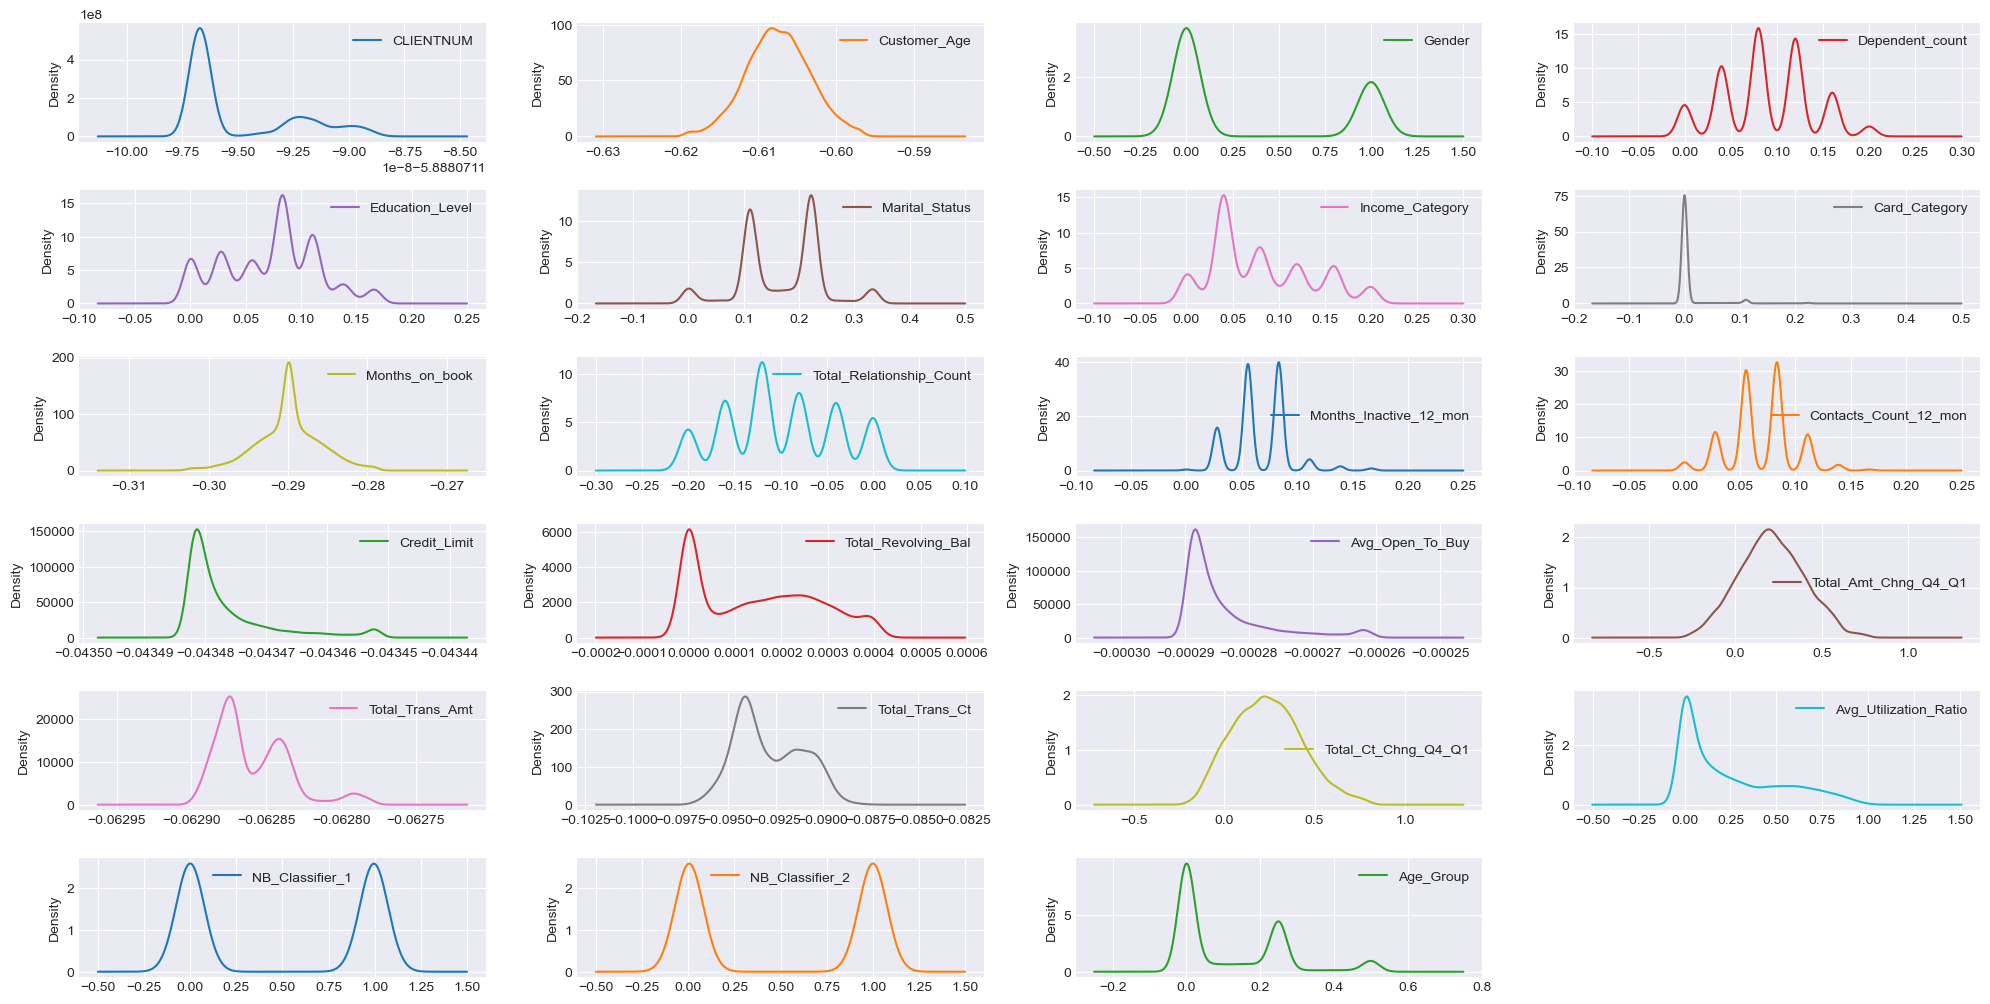

In [91]:
plt.figure(figsize=(25, 20), dpi= 100)
NR_Xtrain_df.plot(kind='density', subplots=True, layout=(12,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

## Features Selection

### Multicolinearity

In [92]:
NR_Xtrain_df['Attrition_Flag'] = y_train

<Axes: >

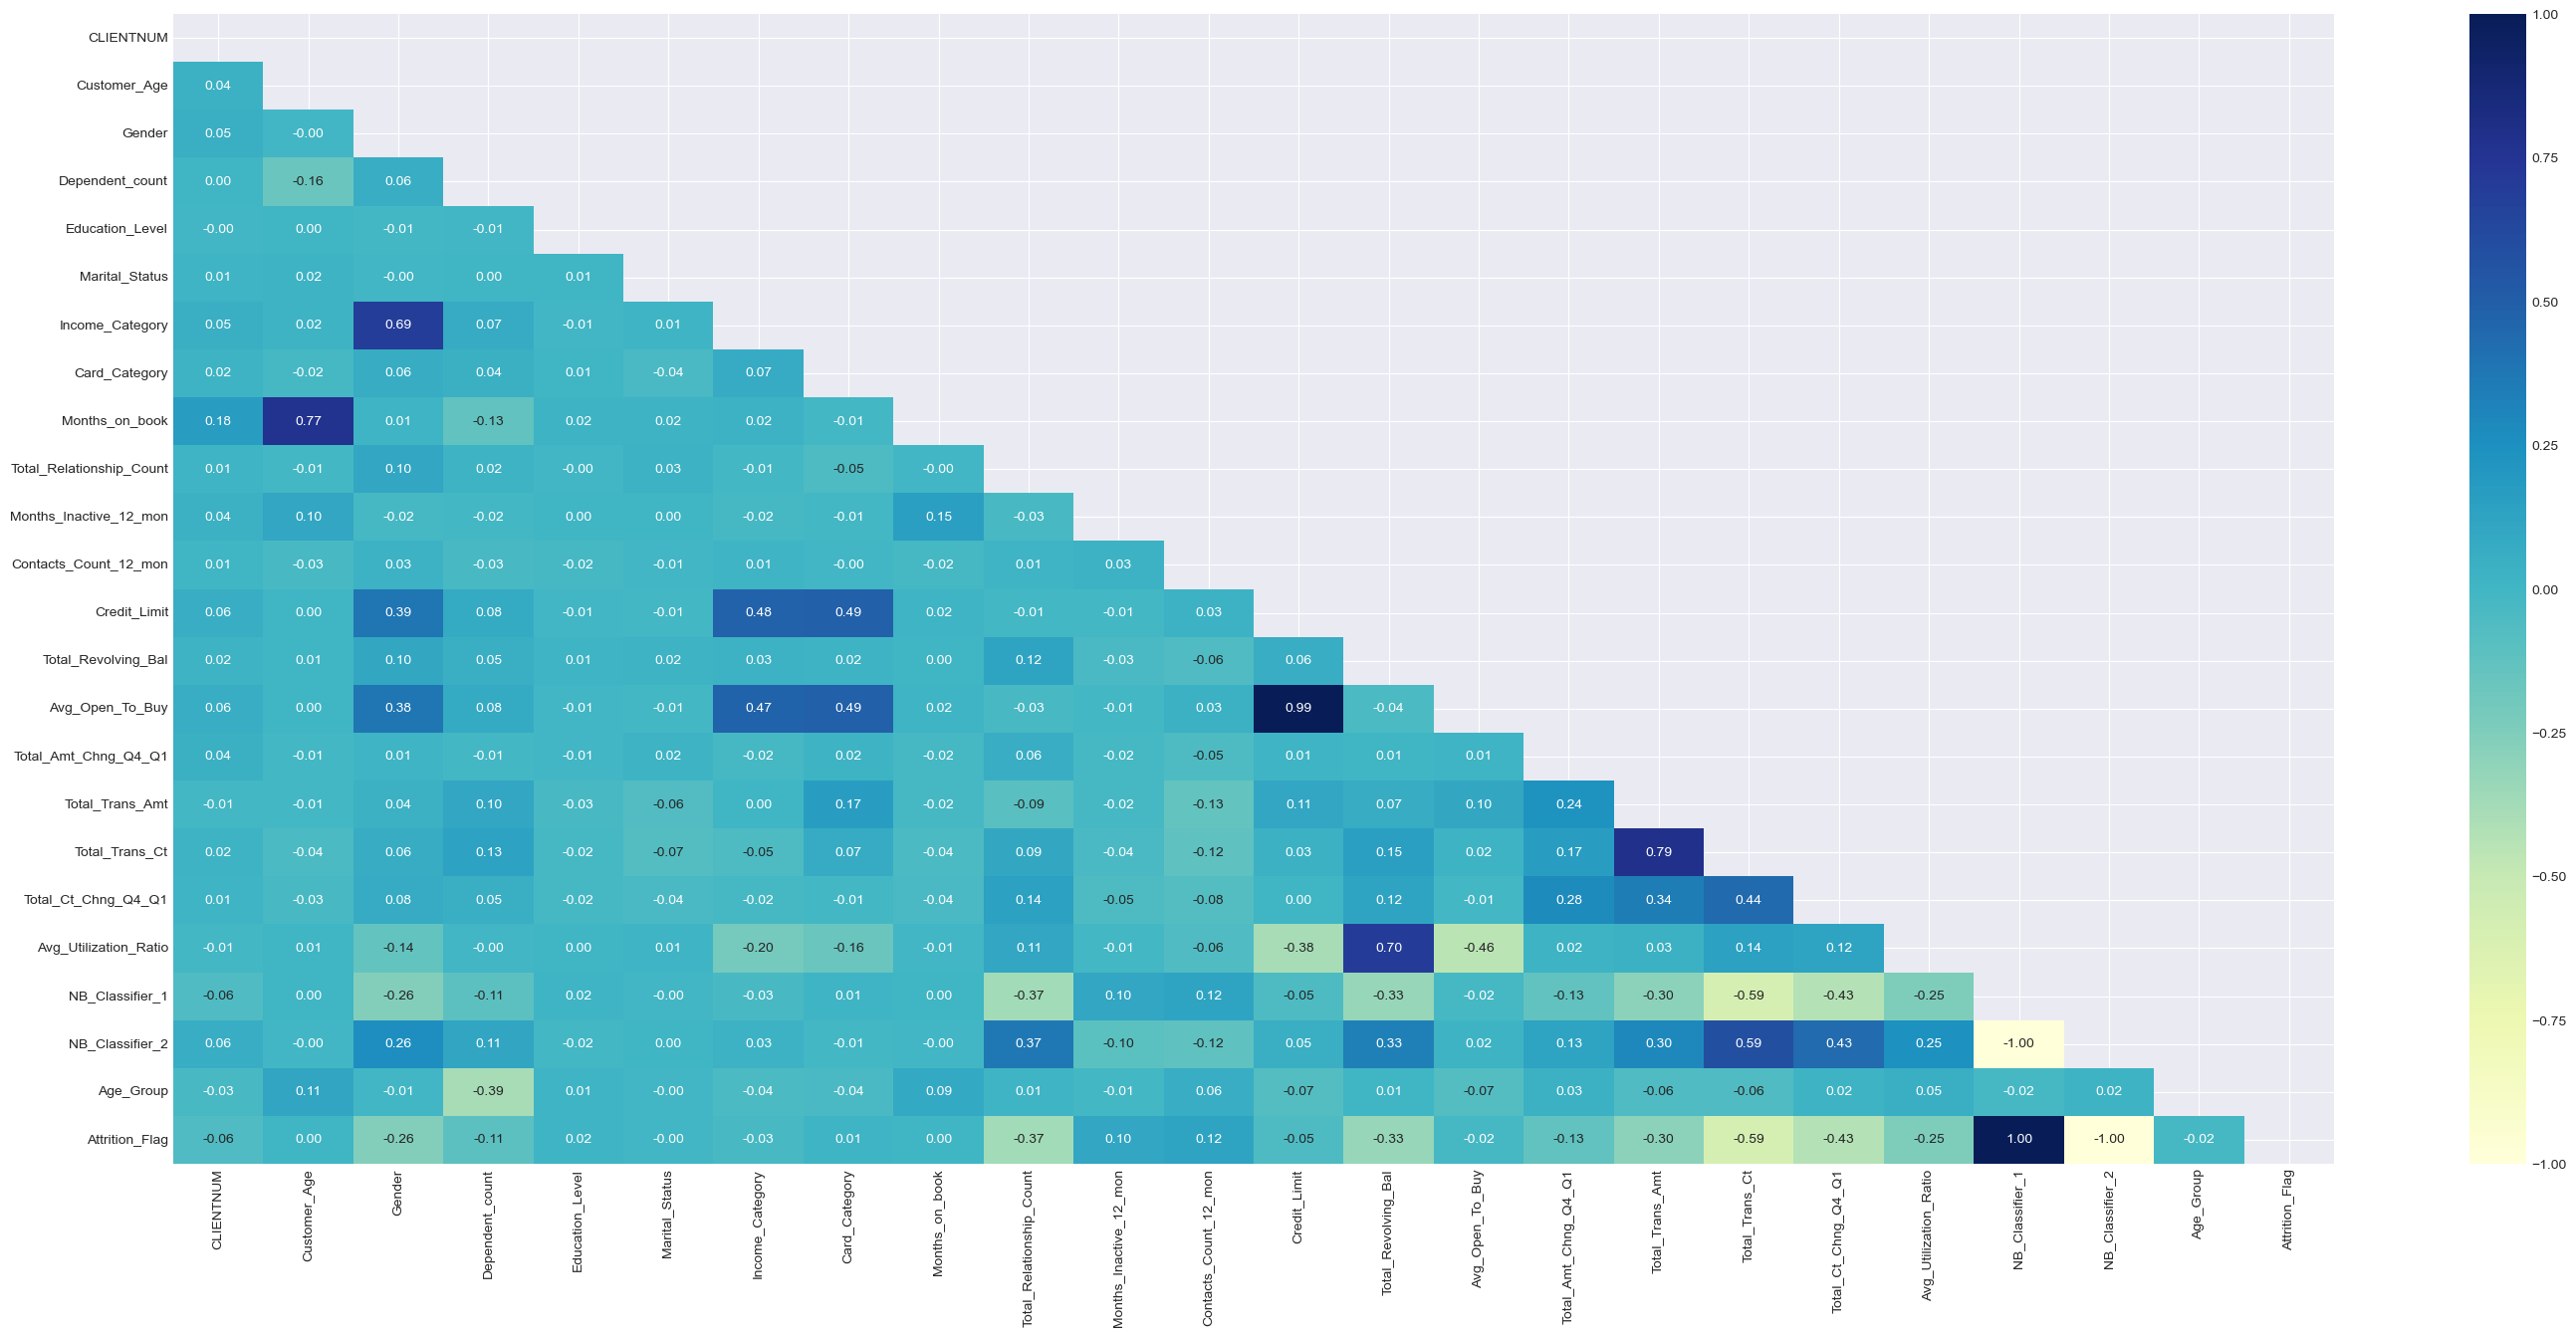

In [93]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [94]:
NR_Xtrain_df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group', 'Attrition_Flag'],
      dtype='object')

In [95]:
columntoDrop = ['Avg_Open_To_Buy', 'NB_Classifier_1', 'NB_Classifier_2' ]
NR_Xtest_df.drop(columns=columntoDrop, inplace= True)
NR_Xtrain_df.drop(columns=columntoDrop, inplace= True)


<Axes: >

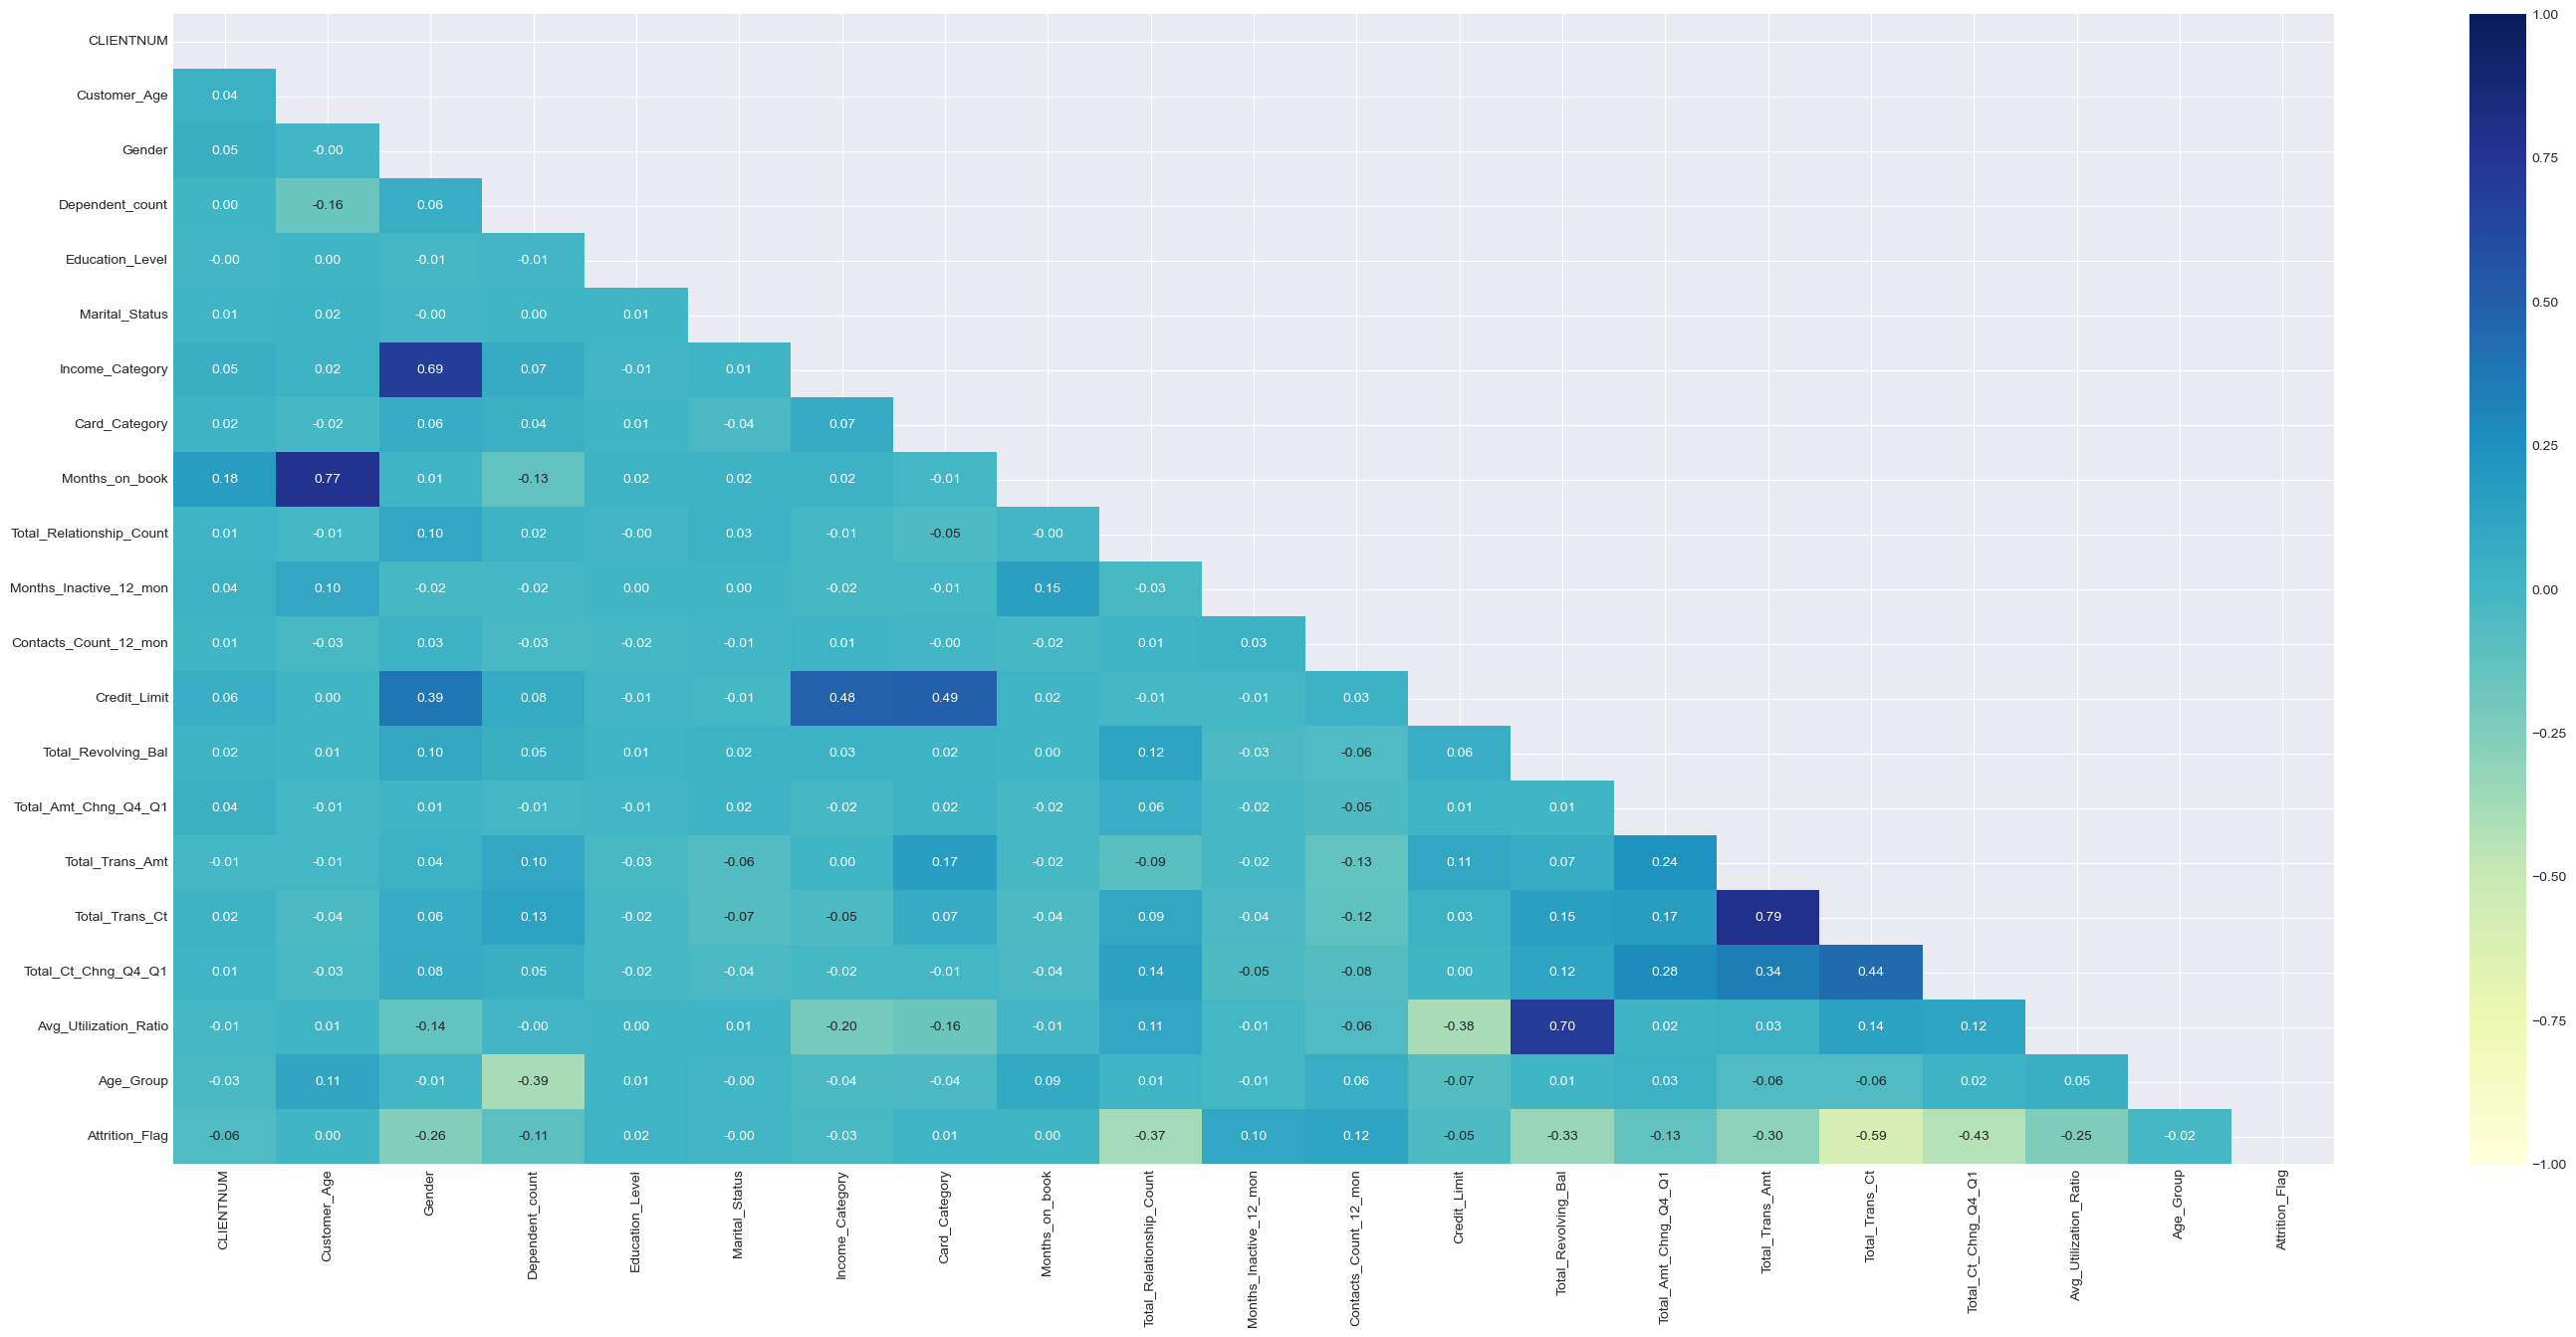

In [96]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [97]:
NR_Xtrain_df = NR_Xtrain_df.drop(columns = 'Attrition_Flag')

In [98]:
NR_Xtrain_df.shape

(11434, 20)

In [99]:
from sklearn.feature_selection import RFE
X = NR_Xtrain_df.values
Y = y_train
model = RandomForestClassifier() 
rfe = RFE(model, n_features_to_select= 6)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False False False False False False False False False  True False False
 False  True  True  True  True  True False False]
[15  7  3 13 11  5  2 14 10  1  9 12  8  1  1  1  1  1  4  6]


In [100]:
RFE_ = [name for name, value in zip(NR_Xtrain_df.columns, fit.ranking_) if value == 1]
len(RFE_)

6

In [101]:
RFE_

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [102]:
X_train = NR_Xtrain_df[RFE_].values
X_test = NR_Xtest_df[RFE_].values

In [103]:
# Spot-Check Classifier Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('Ridge', RidgeClassifier()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.737100 (0.010519)
Ridge: 0.740773 (0.010502)
Lasso: nan (nan)
KNN: 0.732815 (0.015185)
CART: 0.920237 (0.007282)
RF: 0.949450 (0.008292)
SVM: 0.748295 (0.008305)


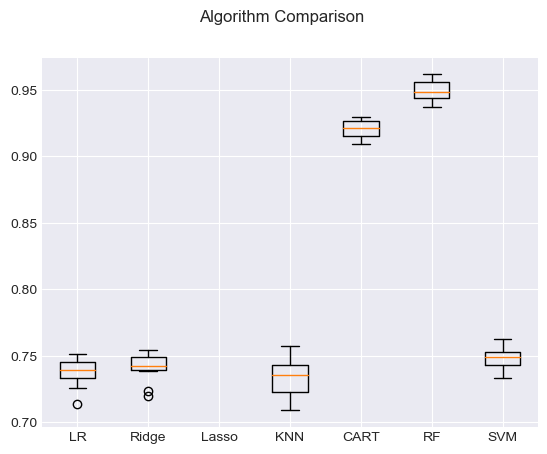

In [104]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [107]:
# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1431
           1       0.93      0.93      0.93      1431

    accuracy                           0.93      2862
   macro avg       0.93      0.93      0.93      2862
weighted avg       0.93      0.93      0.93      2862

F1-score:  0.9316987740805605


In [108]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1337   94]
 [ 101 1330]]


## Plotting ROC curve

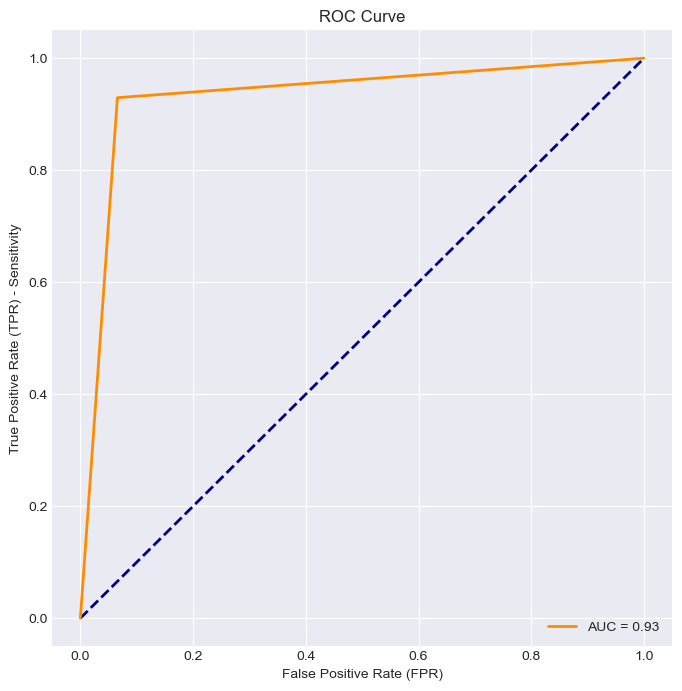

In [109]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
#plot the diagonal 50% LINE
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plot the fpr, tpr achieved by our model
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Second Stage

In [127]:
X_train, X_test, y_train, y_test = (
    transformed_X_train[RFE_],
    transformed_X_test[RFE_],
    transformed_y_train,
    transformed_y_test
)


In [129]:
#Rescaling
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train)
R_Xtrain = scaler.transform(X_train)
R_Xtest = scaler.transform(X_test)


#Normalization
normalizer = Normalizer().fit(R_Xtrain)
NR_Xtrain = scaler.transform(R_Xtrain)
NR_Xtest = scaler.transform(R_Xtest)

In [130]:
X_train = NR_Xtrain
X_test= NR_Xtest

In [131]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1431
           1       0.94      0.93      0.93      1431

    accuracy                           0.93      2862
   macro avg       0.93      0.93      0.93      2862
weighted avg       0.93      0.93      0.93      2862

F1-score:  0.9333333333333333


## Deployment

In [132]:
#saving the model
with open('model_and_transformers.sav', 'wb') as file:
    pickle.dump((model, scaler, normalizer), file)

In [138]:
# Load the model and transformers
with open('model_and_transformers.sav', 'rb') as file:
    loaded_model, scaler, normalizer = pickle.load(file)

In [140]:
input_data = (180, 80, 54, 0.007880,43,5)

#changing the input data to numpy array
input2np = np.asarray(input_data)
#reshape the array as we are predicing for one instance
reshape_array = input2np.reshape(1,-1)
prediction = loaded_model.predict(reshape_array)
print(prediction)

if prediction[0] == 1:
    print('The customer is on the verge of churning.')
else:
    print('The customer is not on the verge of churning')

[0]
The customer is not on the verge of churning


In [135]:
RFE_

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [141]:
def make_prediction(Total_Relationship_Count, Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct,Total_Ct_Chng_Q4_Q1):
    data = {
        'Total_Relationship_Count': [Total_Relationship_Count],
        'Total_Revolving_Bal' : [Total_Revolving_Bal], 
        'Total_Amt_Chng_Q4_Q1' : [Total_Amt_Chng_Q4_Q1],
        'Total_Trans_Amt' : [Total_Trans_Amt], 
        'Total_Trans_Ct' : [Total_Trans_Ct], 
        'Total_Ct_Chng_Q4_Q1' : [Total_Ct_Chng_Q4_Q1]
        
    }
    df = pd.DataFrame(data)
    df2array = np.asarray(df)
    reshape_array = df2array.reshape(1, -1)

    def transformation(reshape_array):
        scaler_reshape = scaler.transform(reshape_array)
        normalizer_reshape = normalizer.transform(scaler_reshape)
        return normalizer_reshape

    #transform data
    transformed_data = transformation(reshape_array)

    # make prediction
    prediction = loaded_model.predict(transformed_data)

    if prediction[0] == 1:
        print('The customer is on the verge of churning.')
    else:
        print('The customer is not on the verge of churning')

    return df


In [142]:
make_prediction(180, 80, 54, 0.007880,30,33)

The customer is on the verge of churning.


Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       180                   80                    54   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0          0.00788              30                   33

In [143]:
n = df1[RFE_]

In [145]:
n['Attrited_Flag'] = df1['Attrition_Flag']

In [148]:
n['Attrited_Flag'] = n['Attrited_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0)

In [151]:
zero_flag = n[n['Attrited_Flag'].apply(lambda x : x == 0)]
one_flag = n[n['Attrited_Flag'].apply(lambda x : x == 1)]

In [153]:
zero_flag['pred'] = loaded_model.predict(zero_flag[RFE_])